In [1]:
import json
from functions import read_json

#!pip install --user graphistry
#import graphistry

from methods import Single_keyword_By_Year, Single_keyword_All_Year
from methods import Add_to_tabu_json, Add_to_replace_json, Plot_Whole_Year_Barchart, Plot_Single_Year_Barchart
from methods import Purge_Co_Count, Establish_All_Year_Network, Plot_Network_via_graphistry

# Reading / Creating files
file_dir = './Data_samples/structured_data/words_count.json'
ref_words = './Data_samples/ref_word.json'
co_word_freq_json = './Data_samples/structured_data/co_word_count.json'
purged_file = './Data_samples/structured_data/purged_co_word_count.json'

# External Parameters
display_threshold_per_year = 20  # number of top keywords to display per year
display_threshold_all_years = 50 # number of top keywords to display for the whole year specturm

# 01 - Process and Visualise Single Word Frequencies

/Users/qmy/Documents/Development/UP_knowledge/methods.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(X_lis, rotation=90)
/Users/qmy/Documents/Development/UP_knowledge/methods.py:145: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


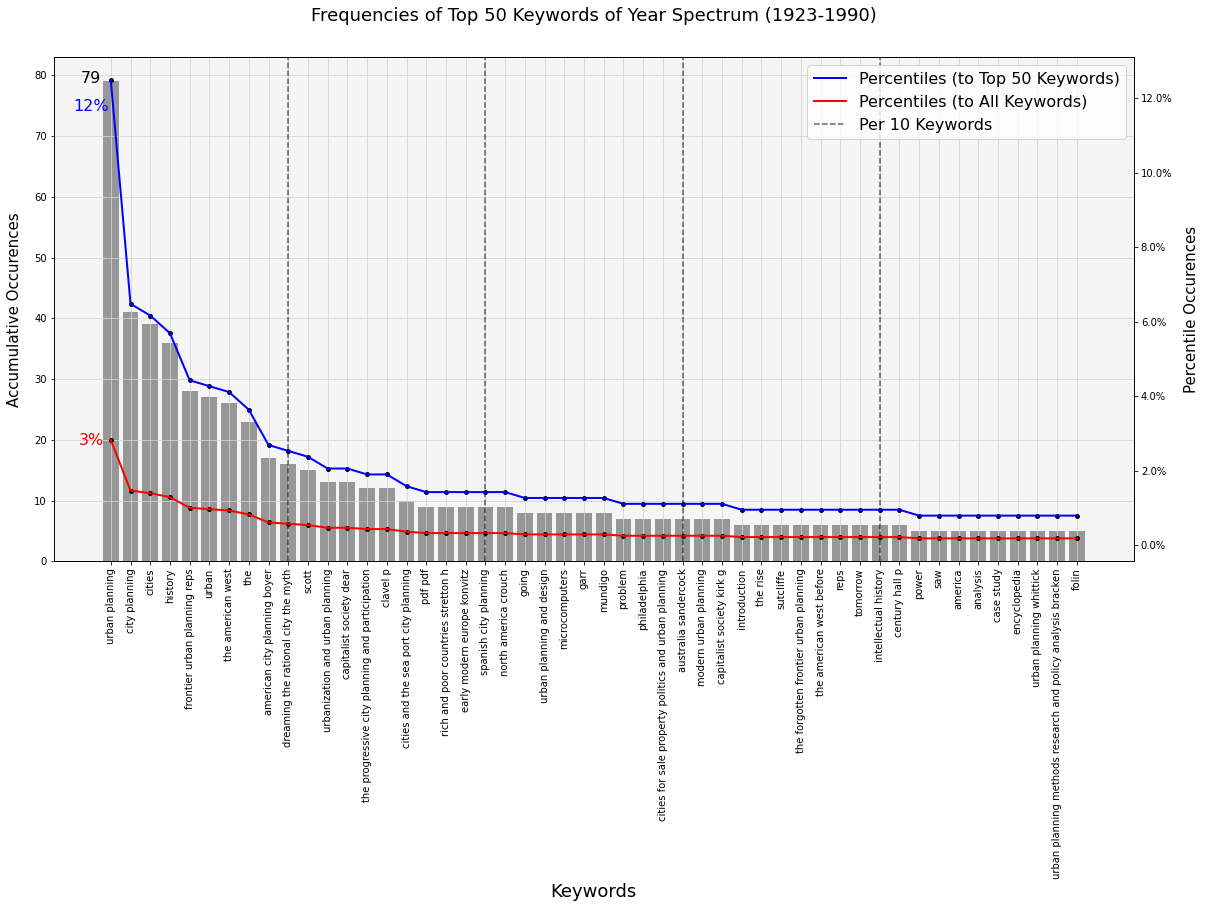

/Users/qmy/Documents/Development/UP_knowledge/methods.py:189: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(X_lis, rotation=90)
/Users/qmy/Documents/Development/UP_knowledge/methods.py:198: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/qmy/Documents/Development/UP_knowledge/methods.py:189: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(X_lis, rotation=90)
/Users/qmy/Documents/Development/UP_knowledge/methods.py:198: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/qmy/Documents/Development/UP_knowledge/methods.py:189: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(X_lis, rotation=90)
/Users/qmy/Documents/Development/UP_knowledge/methods.py:198: UserWarni

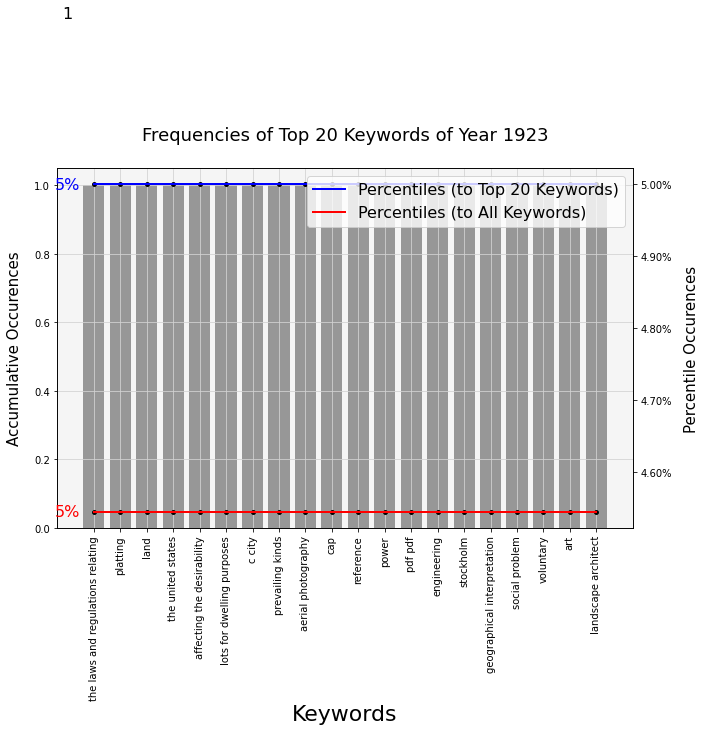

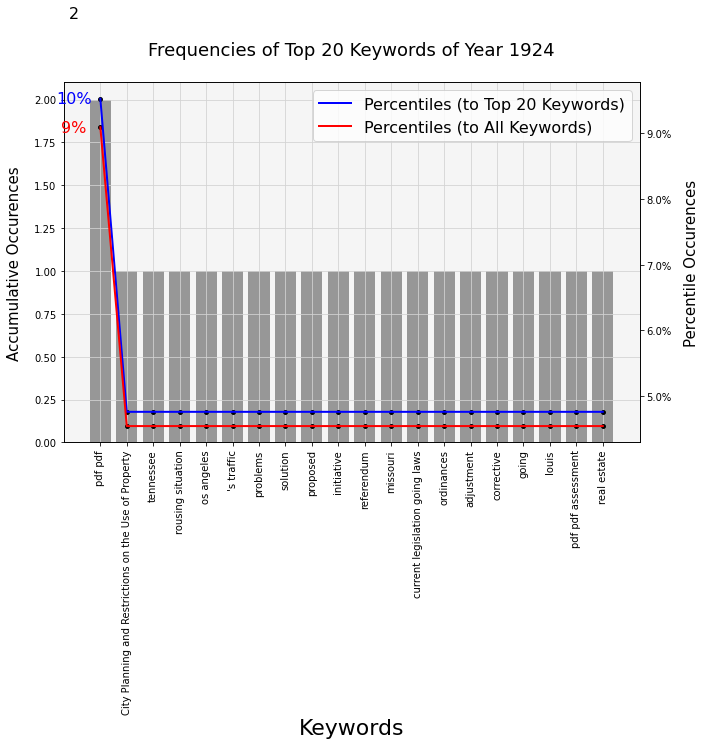

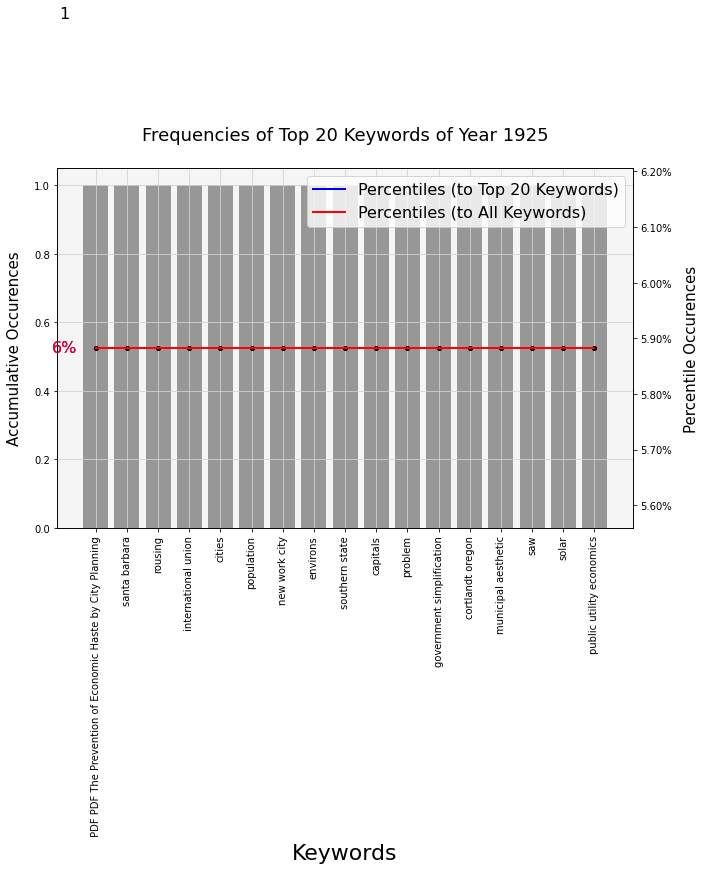

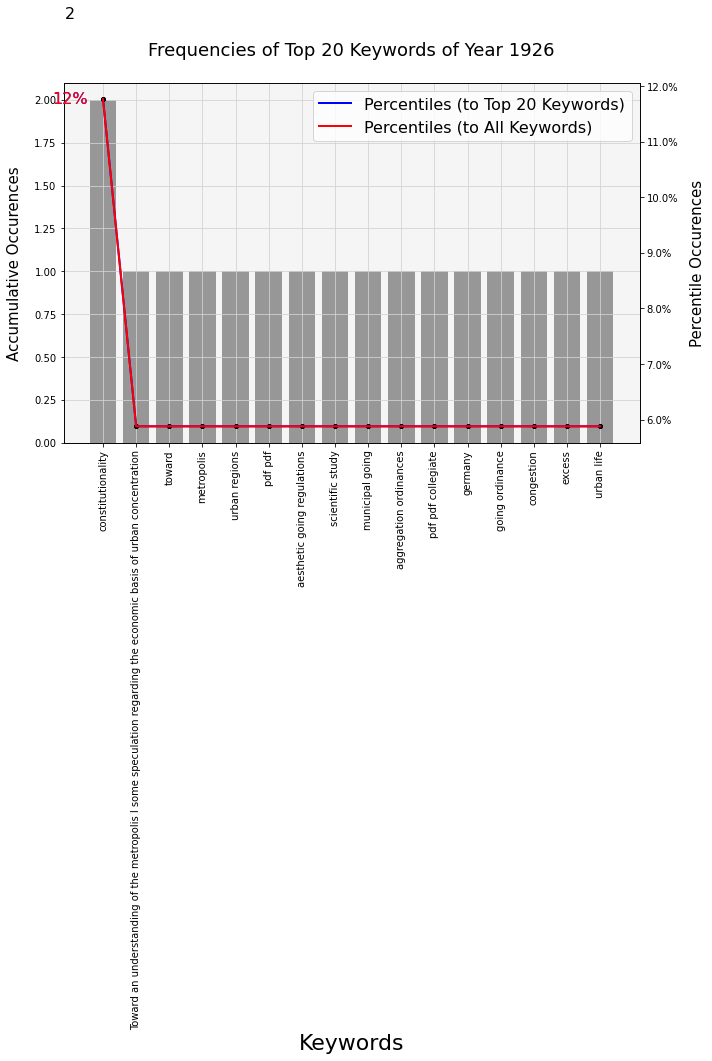

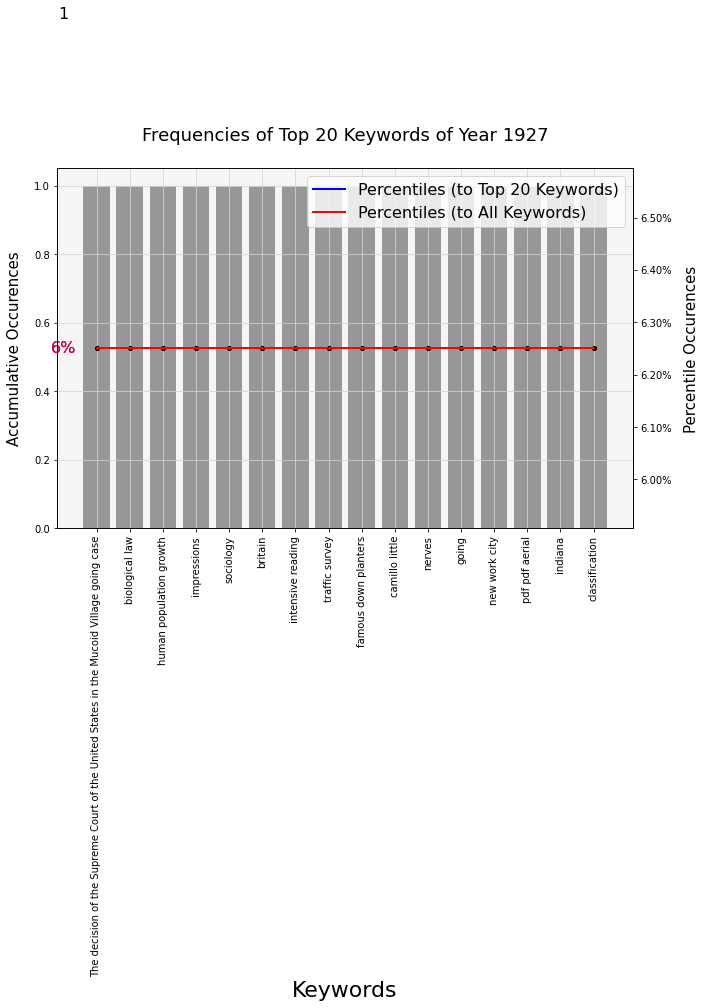

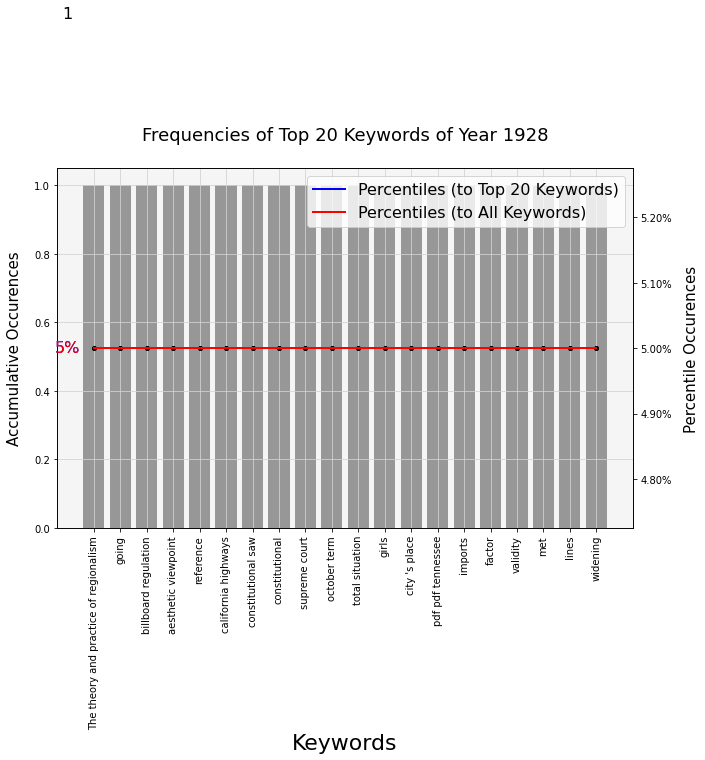

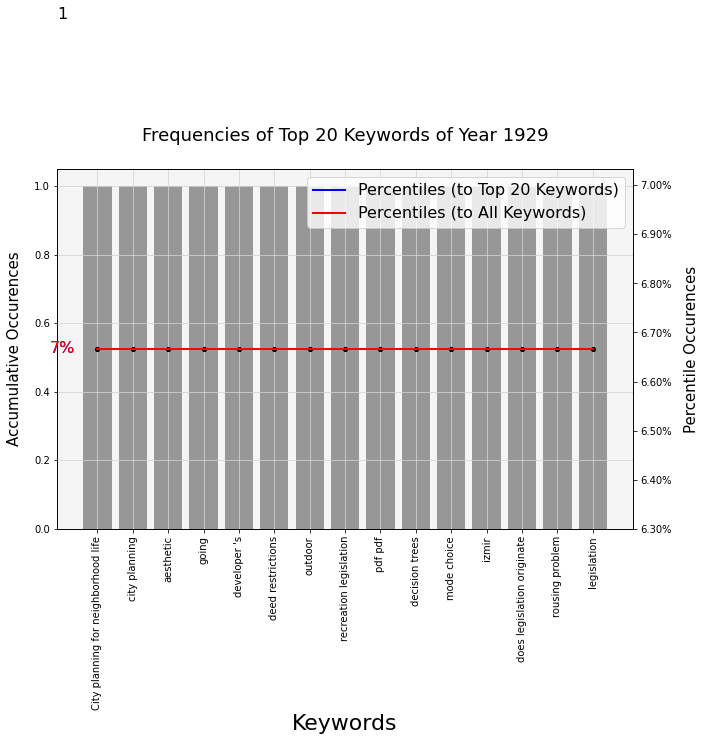

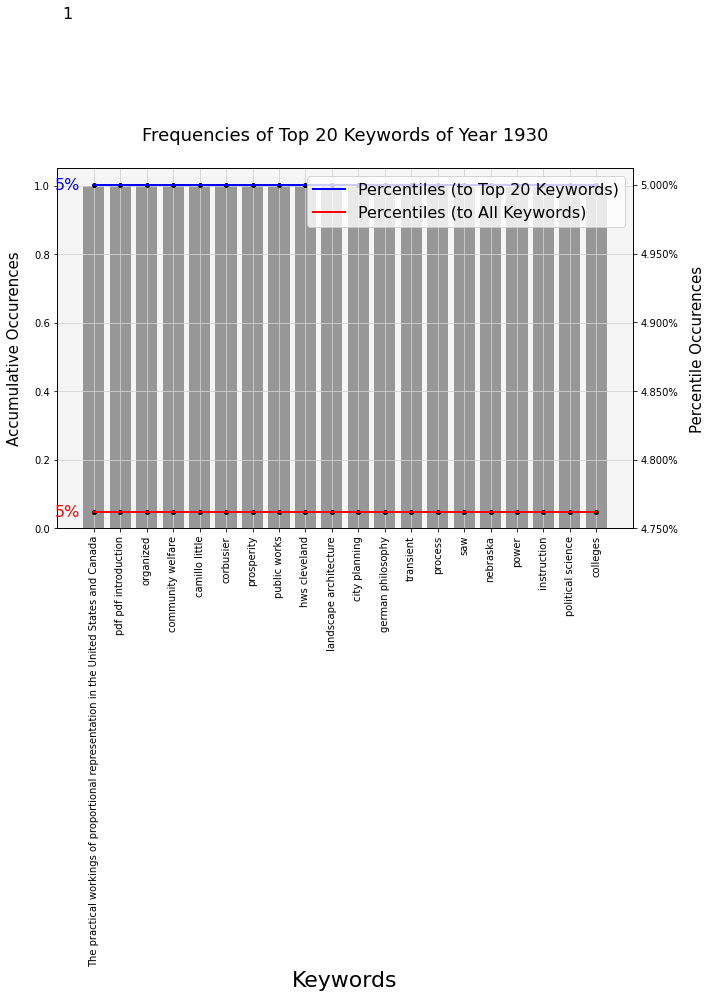

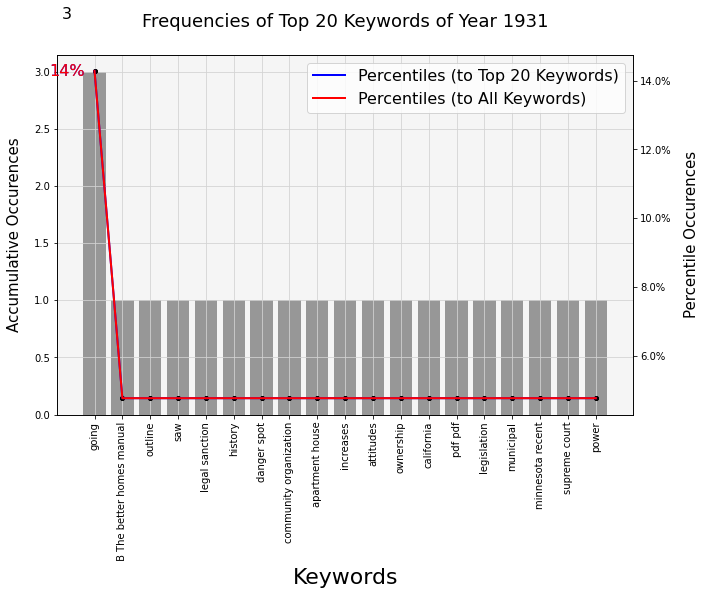

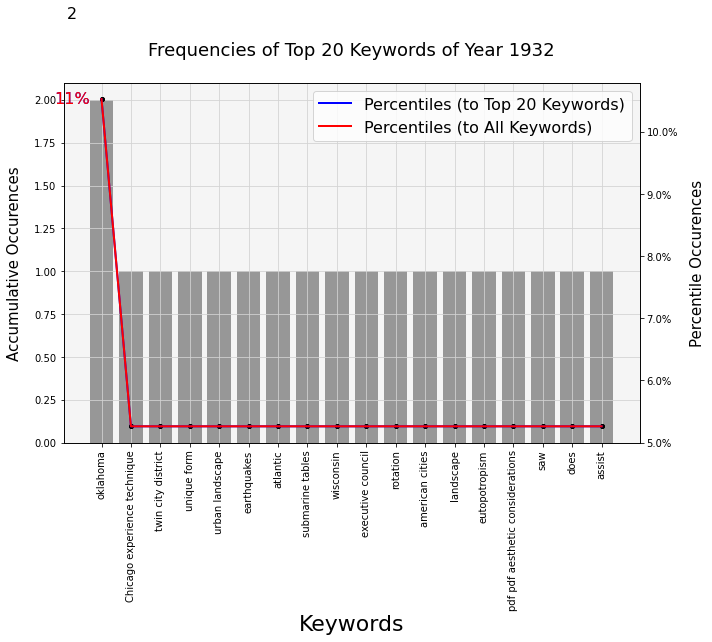

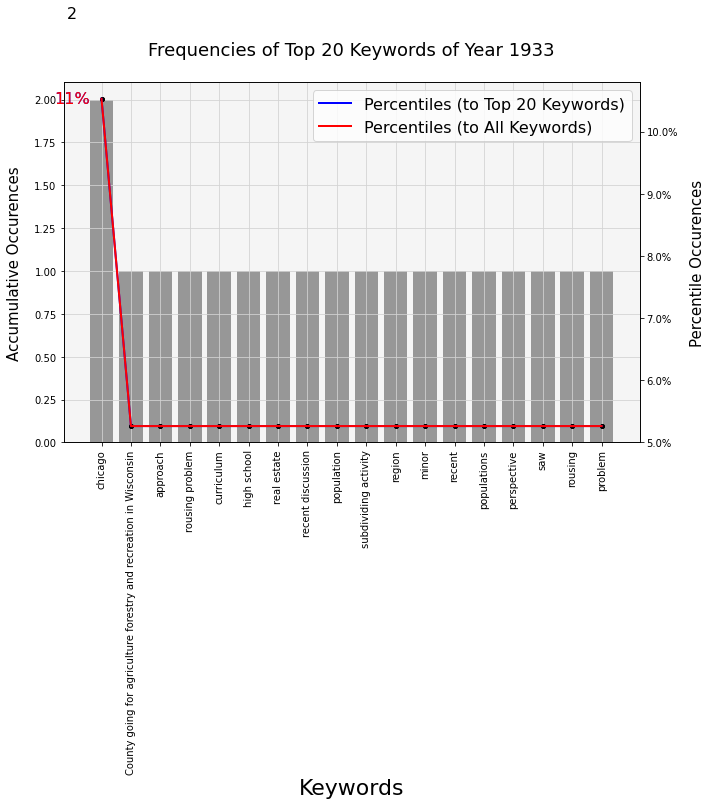

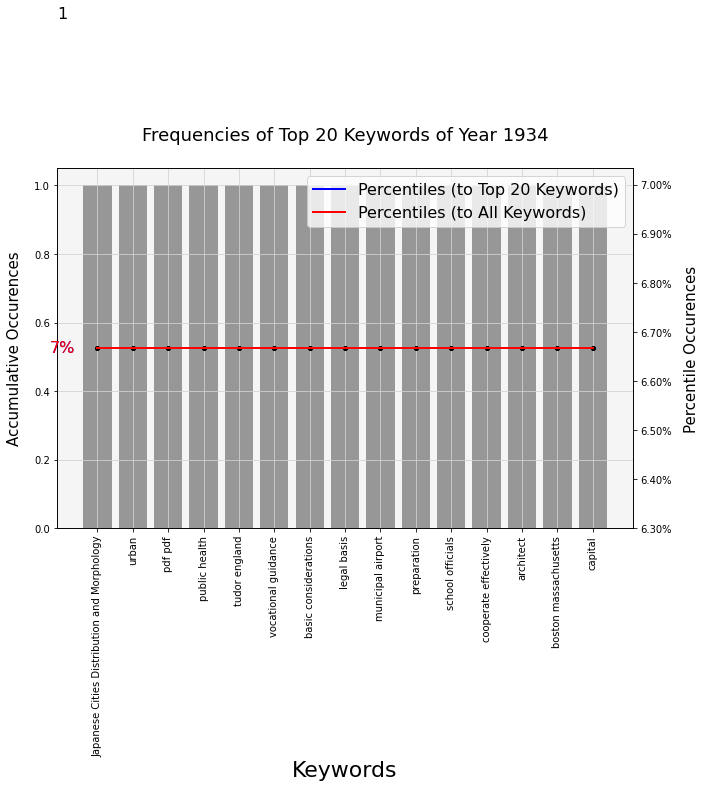

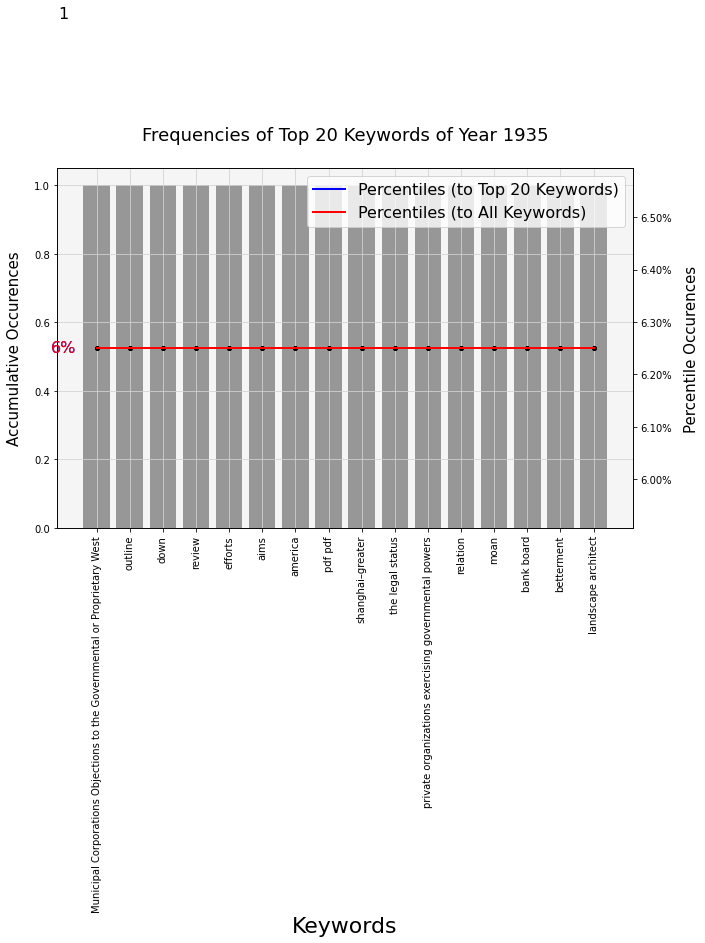

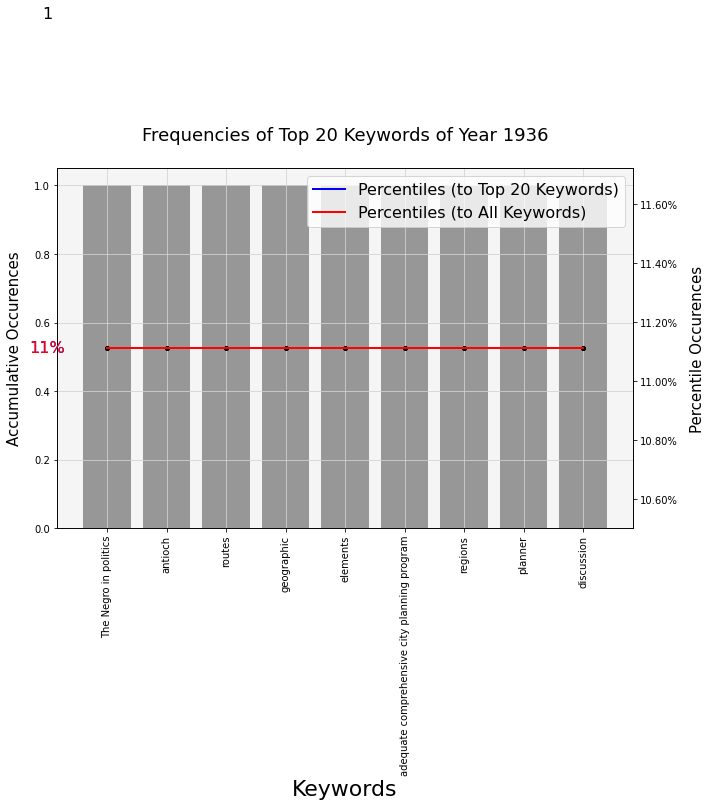

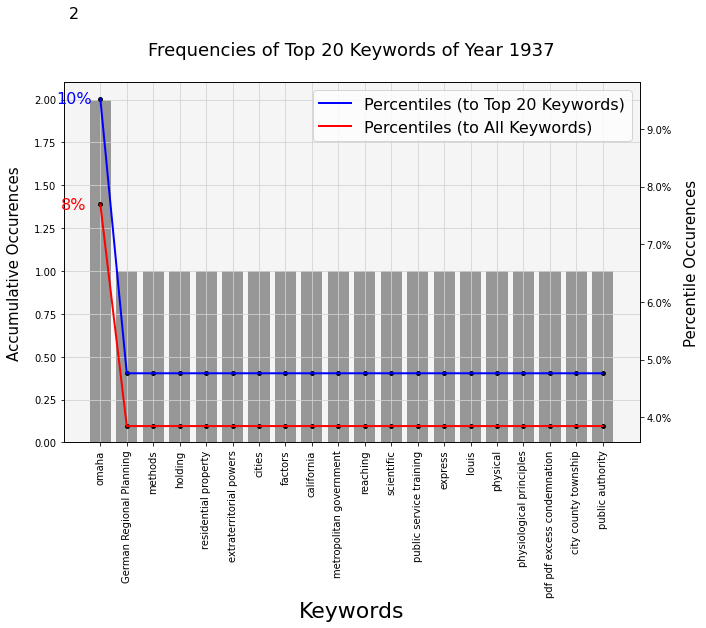

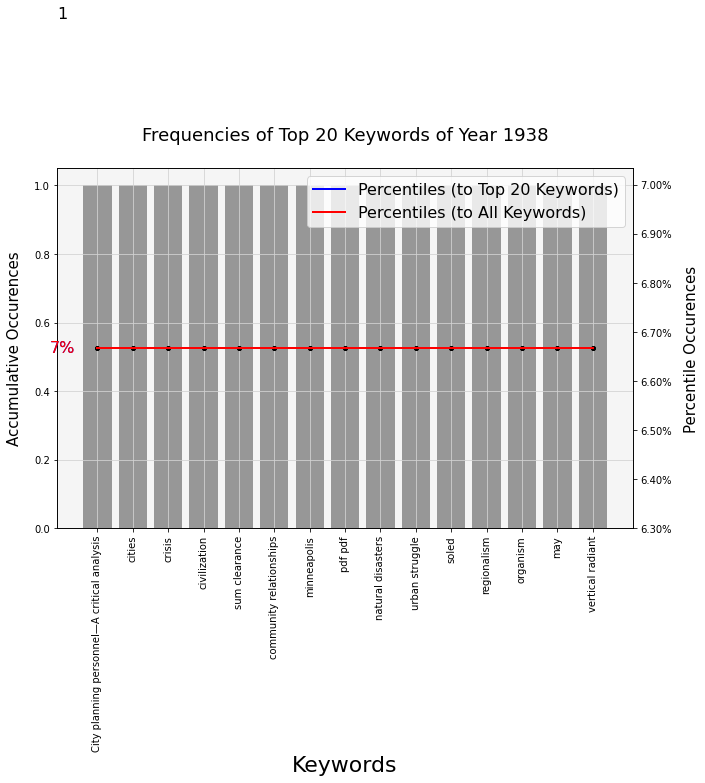

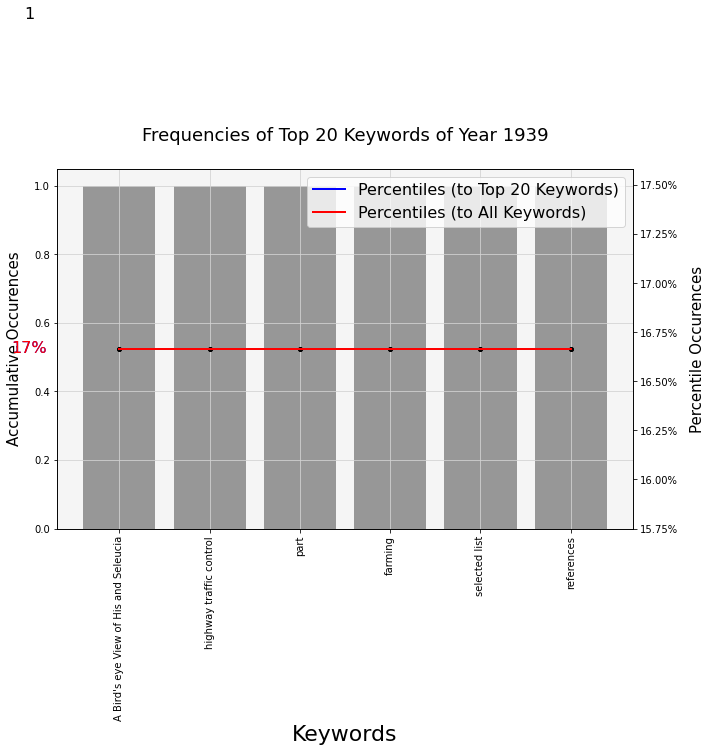

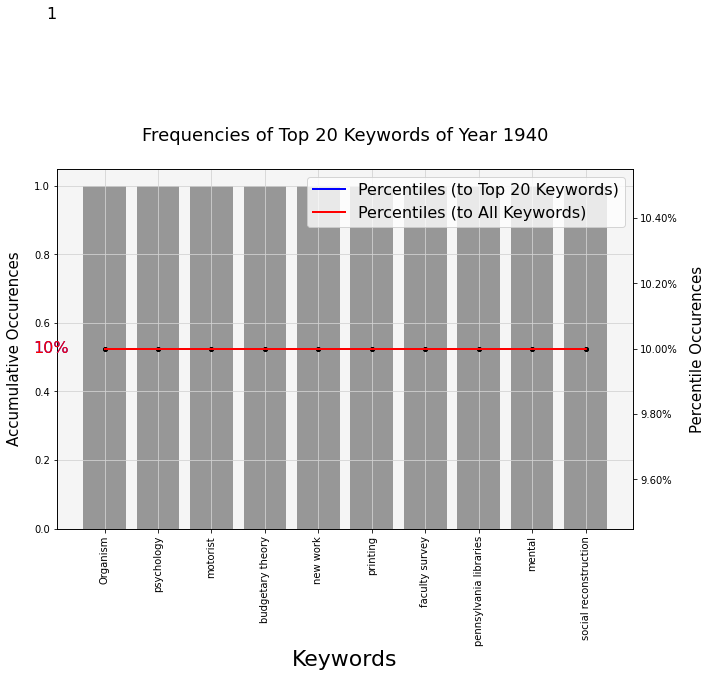

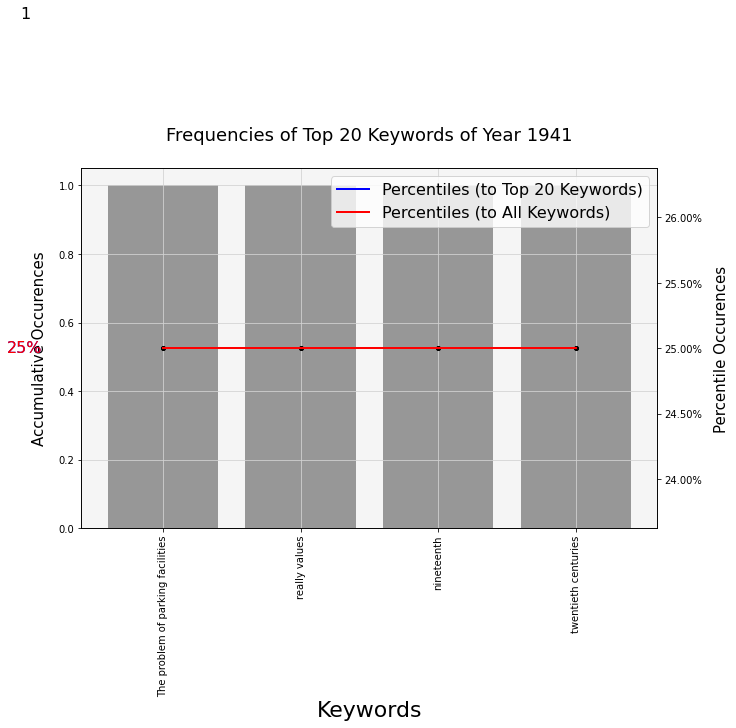

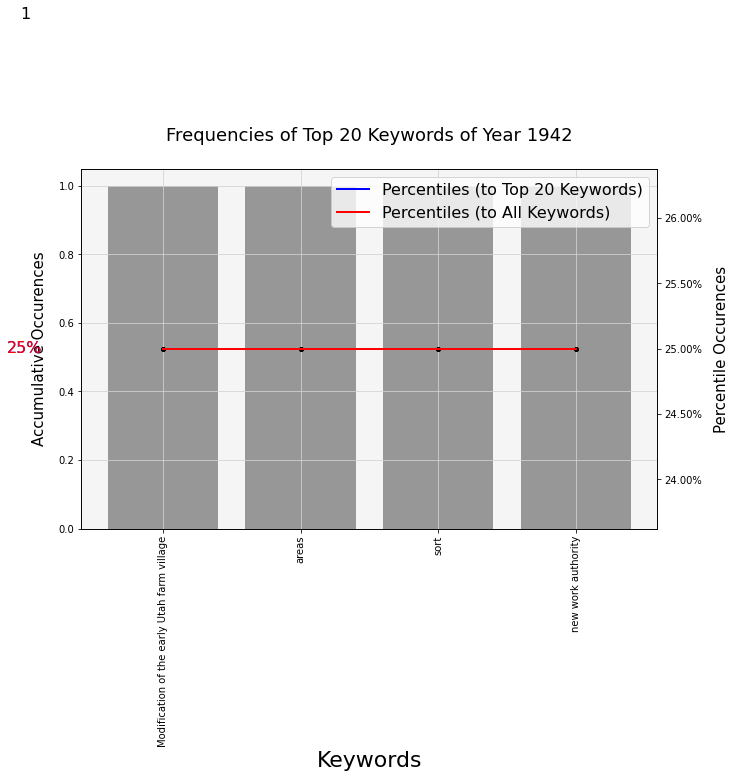

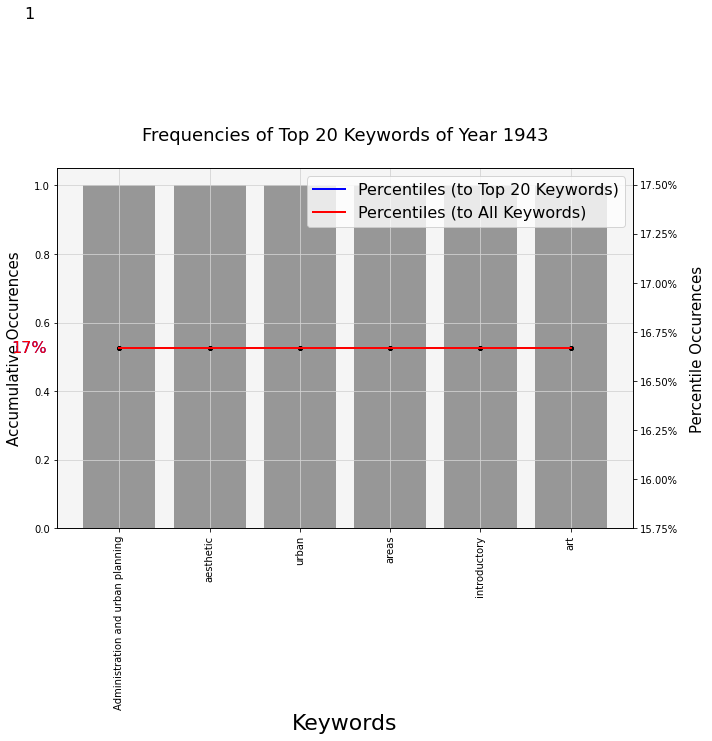

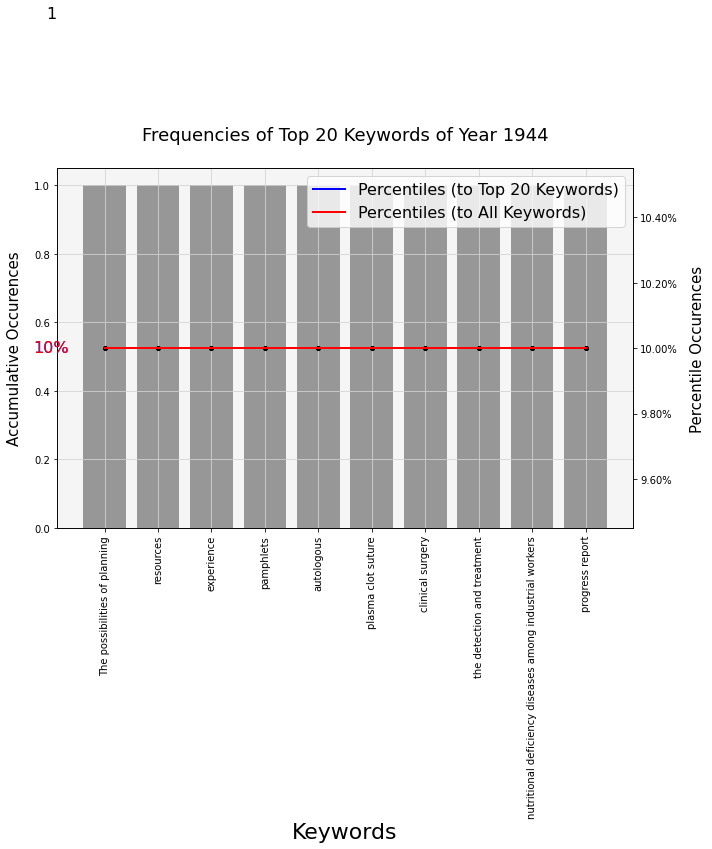

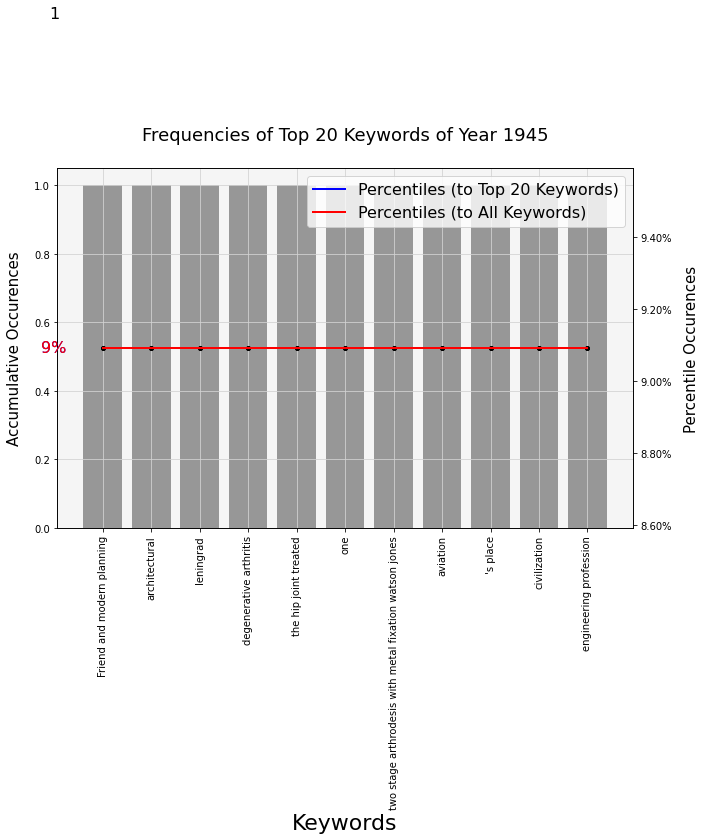

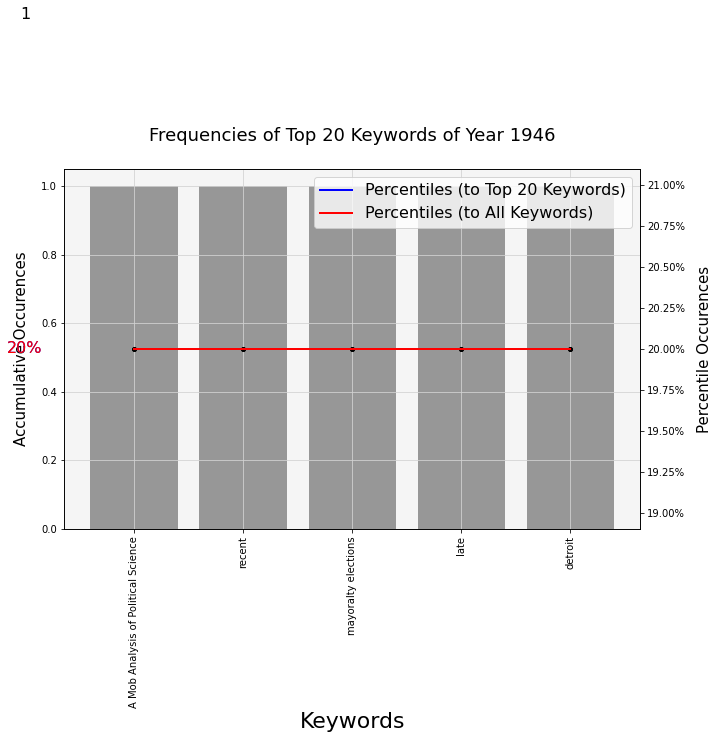

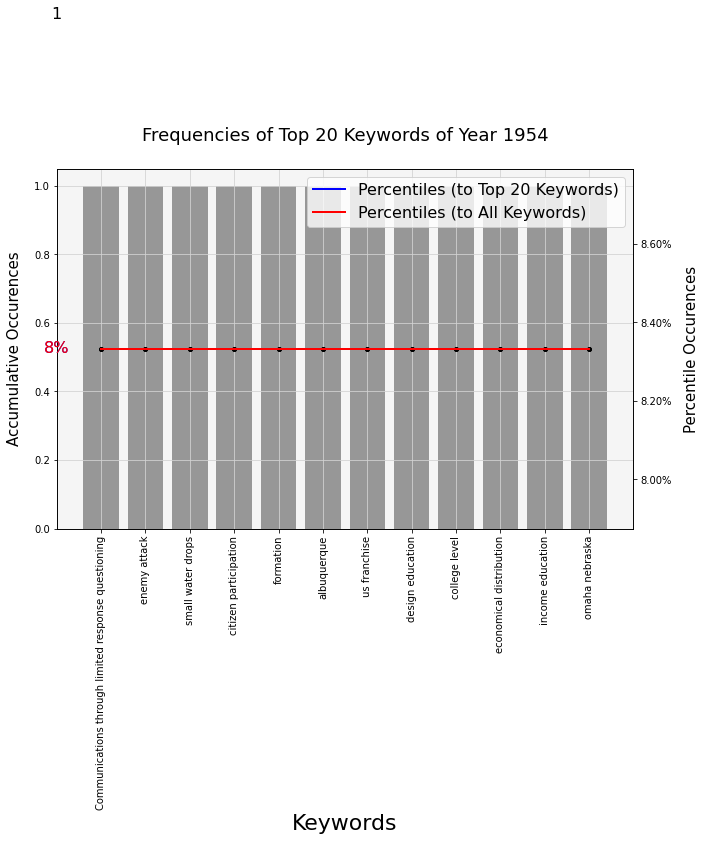

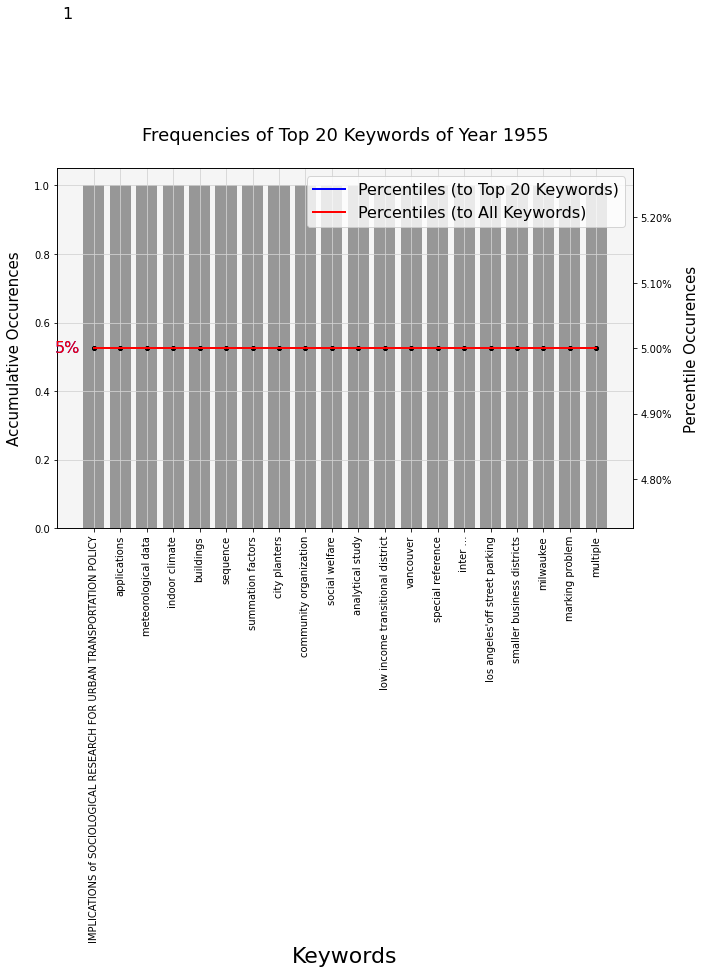

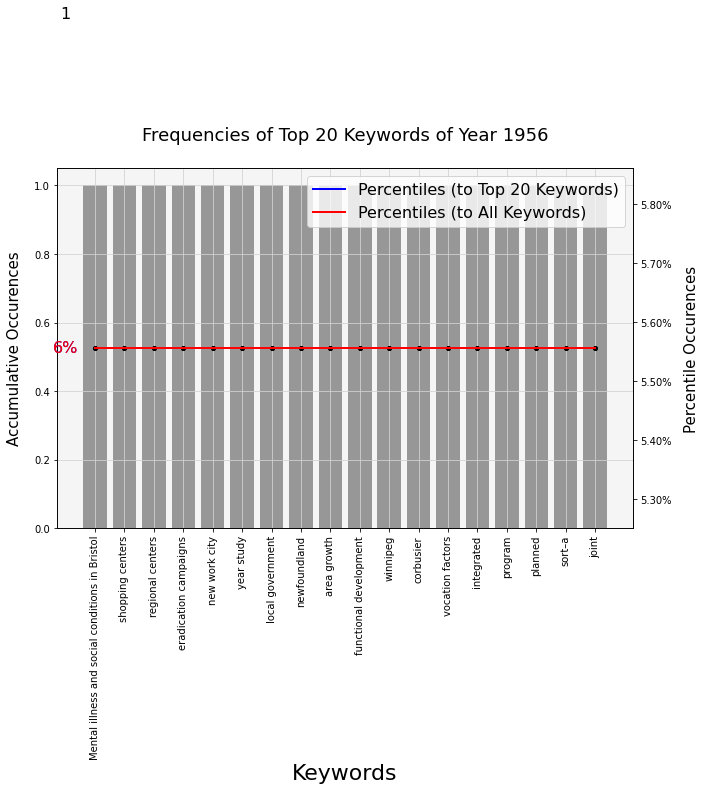

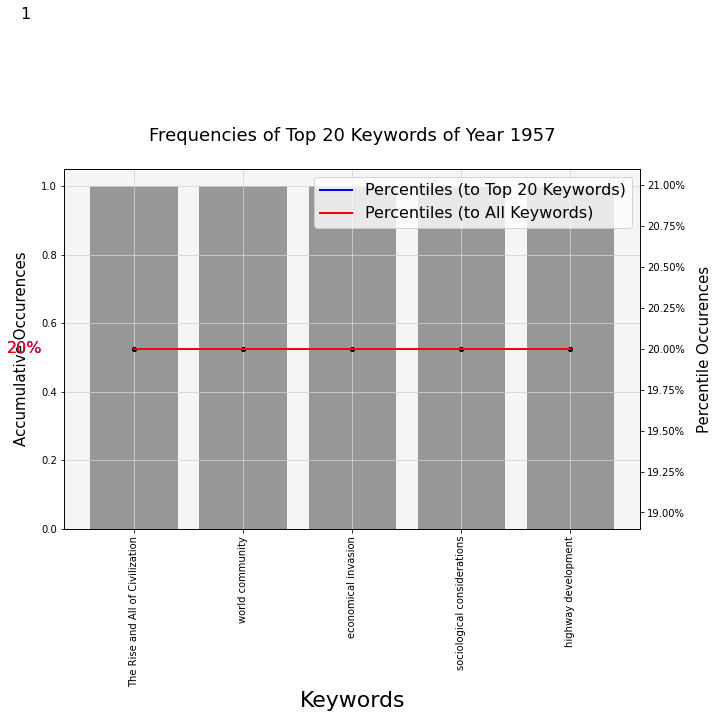

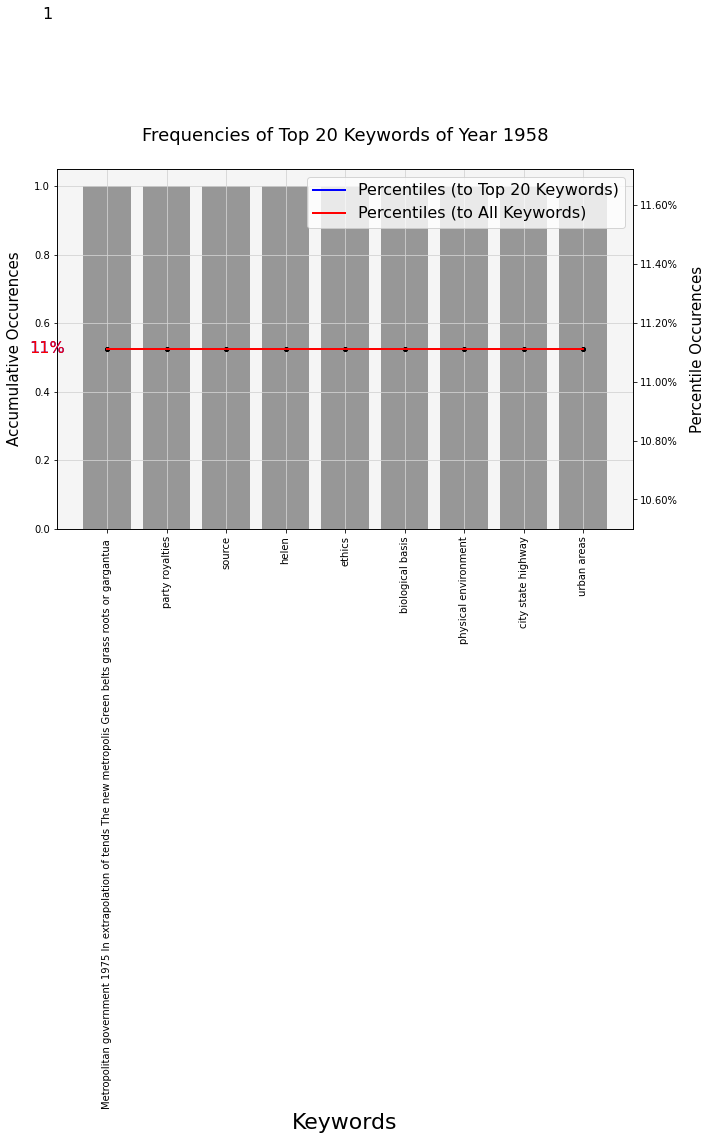

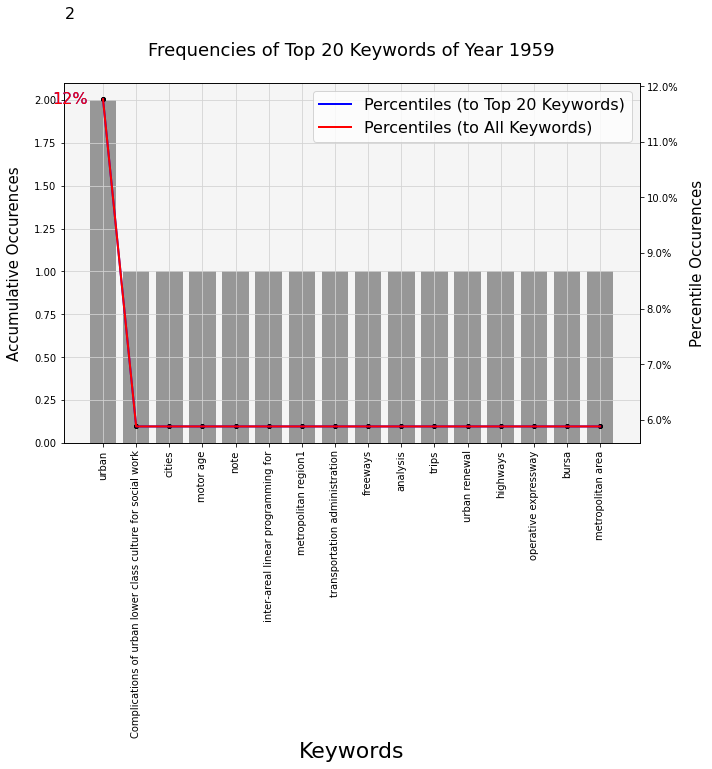

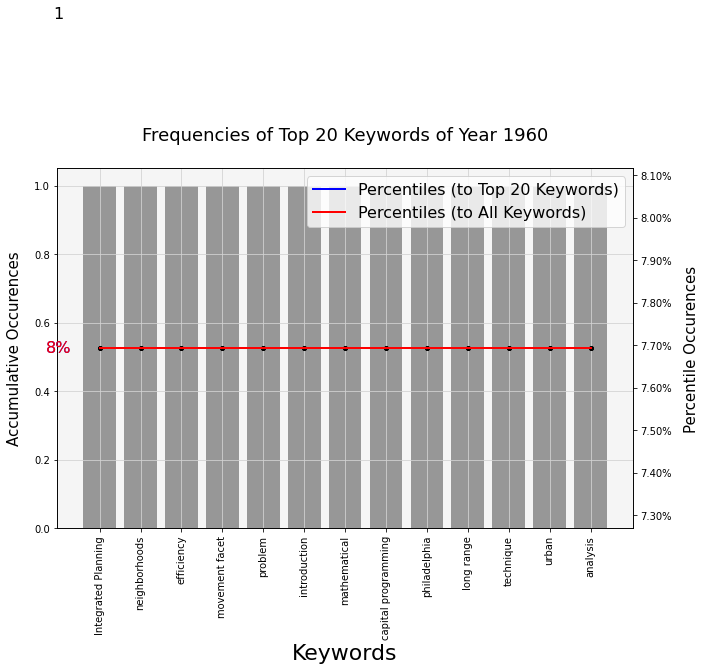

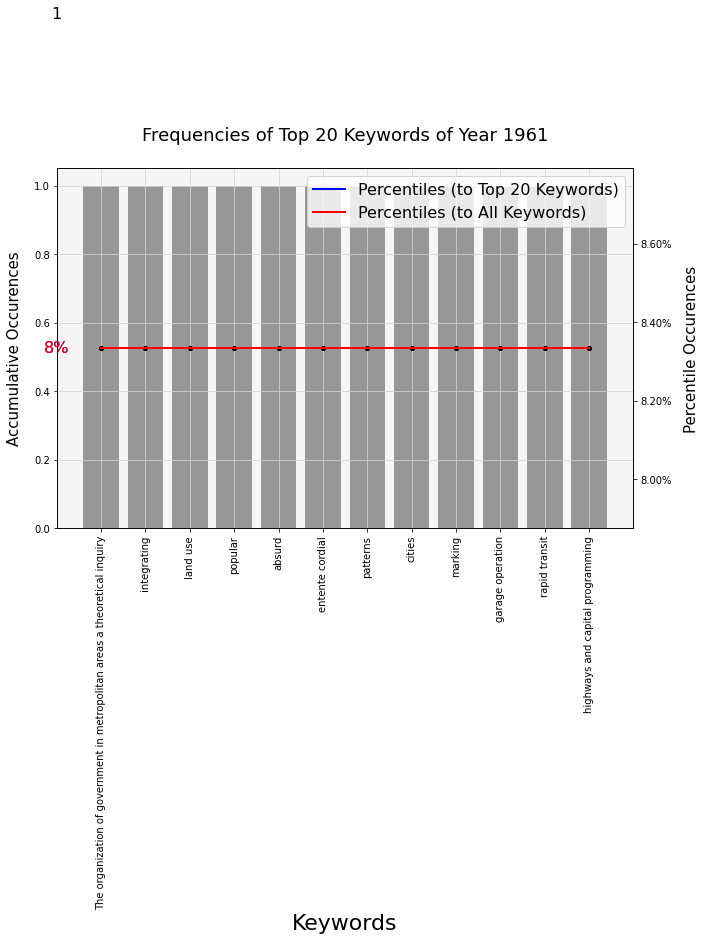

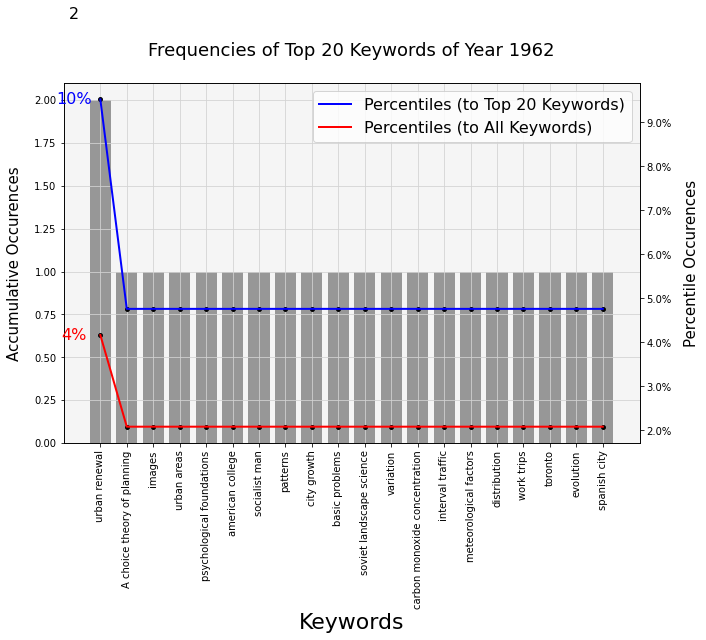

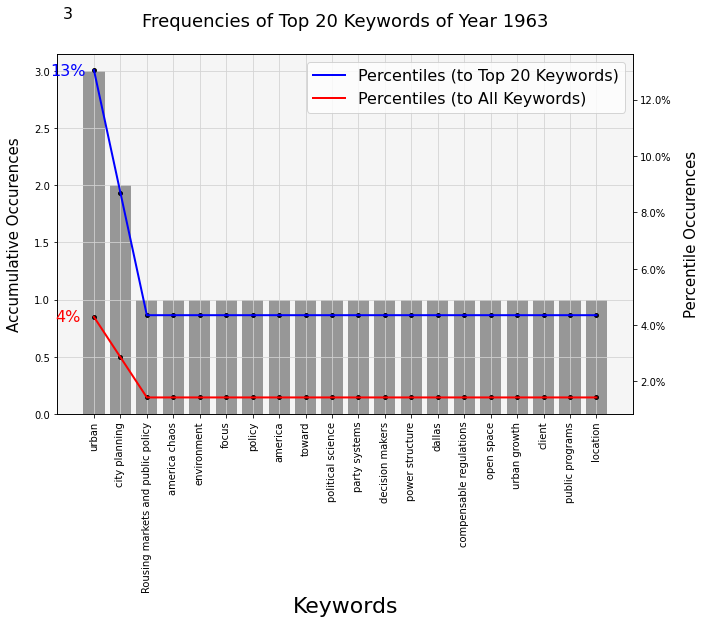

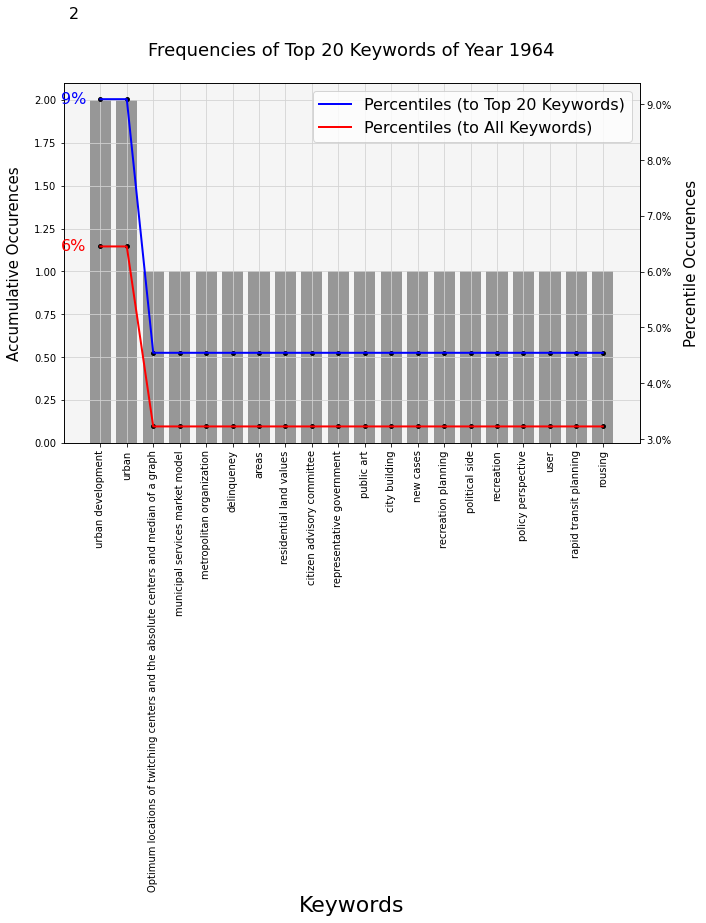

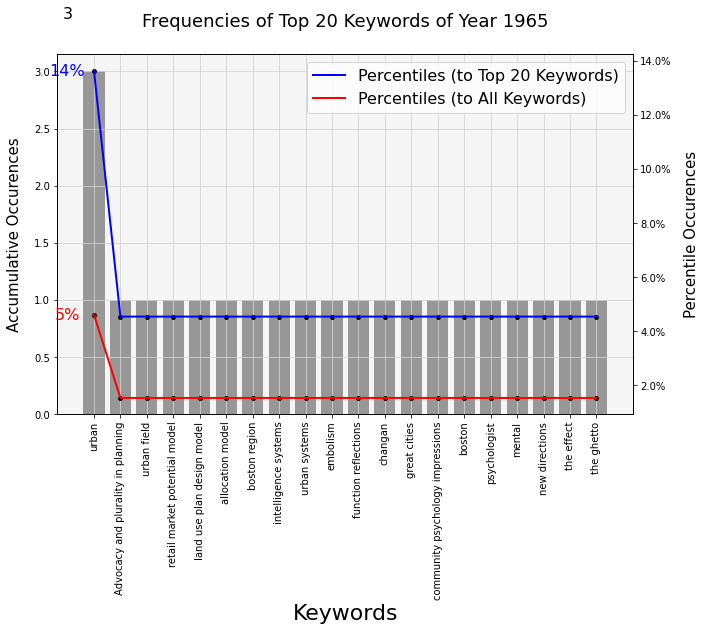

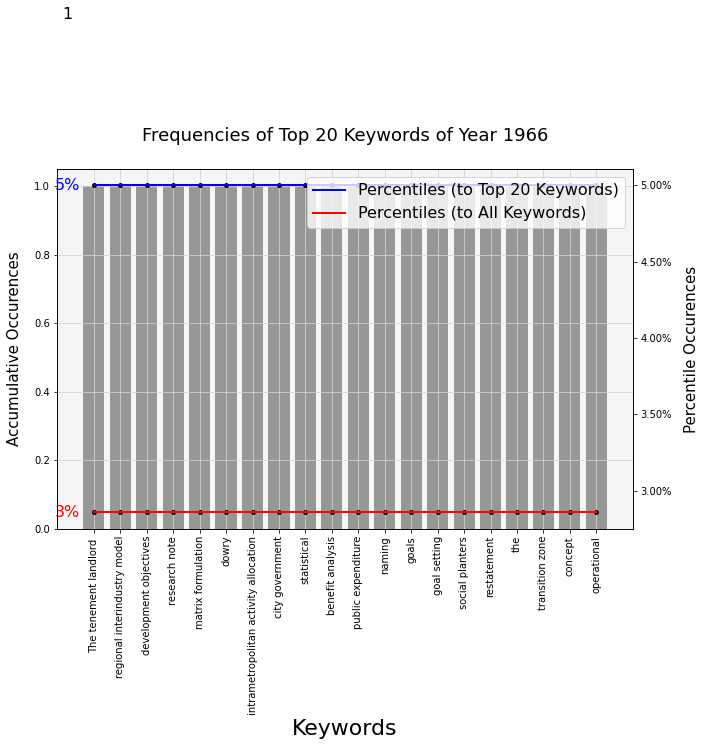

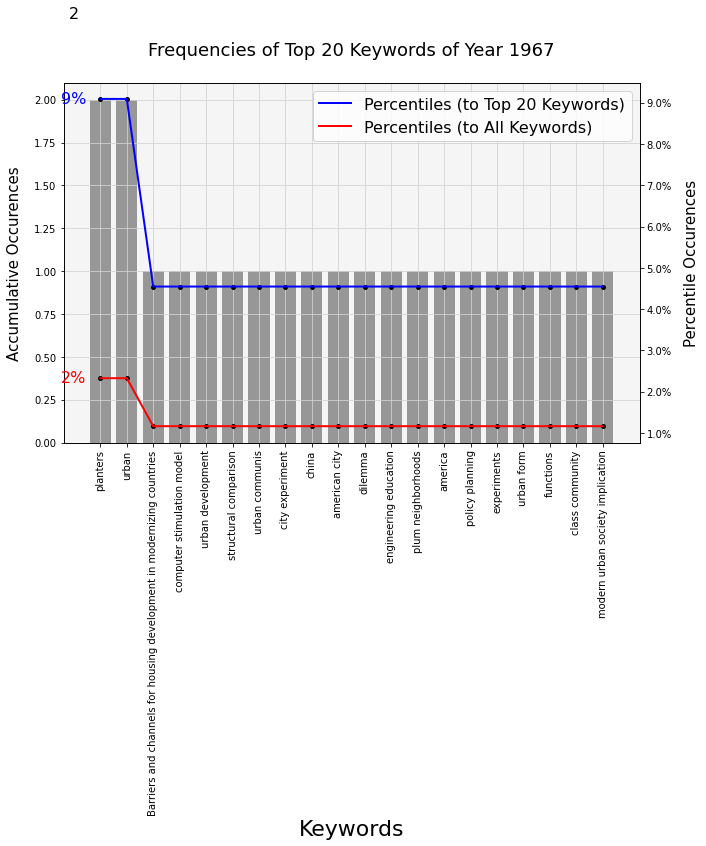

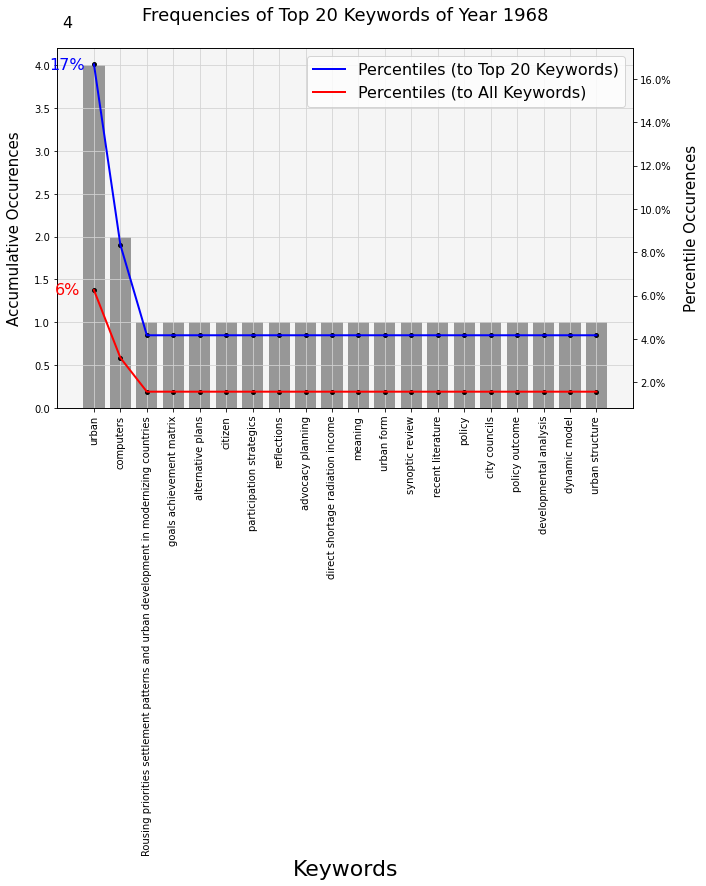

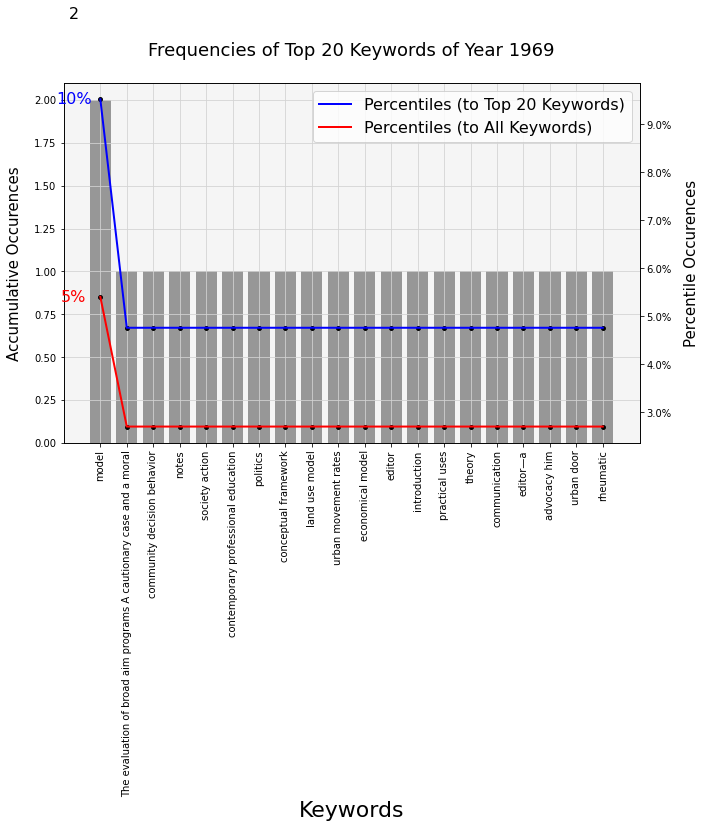

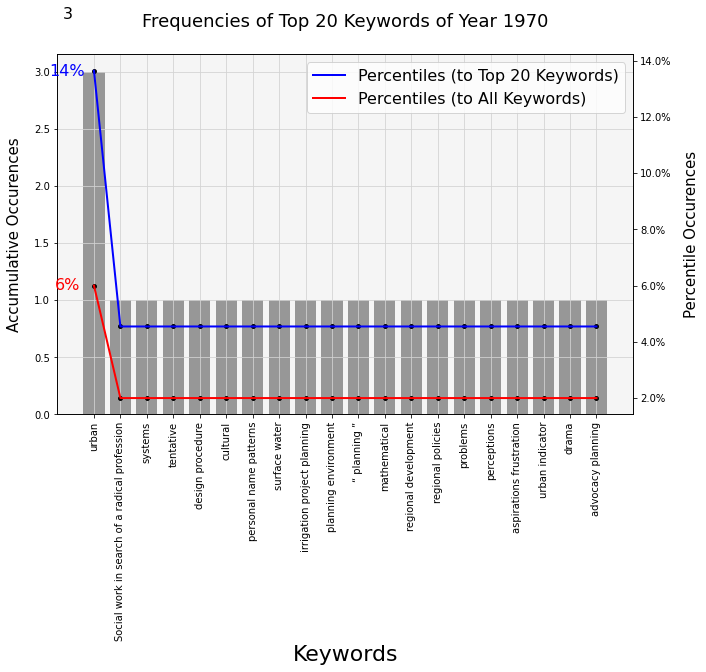

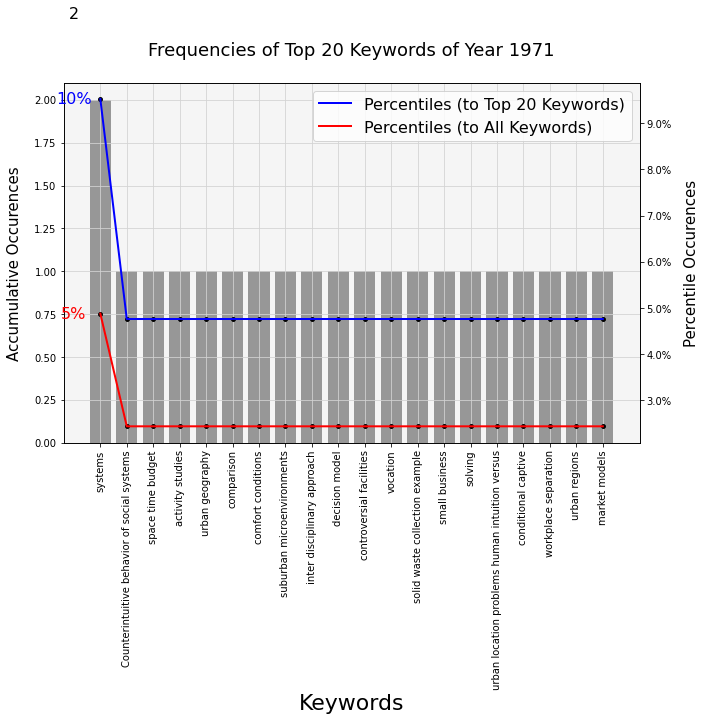

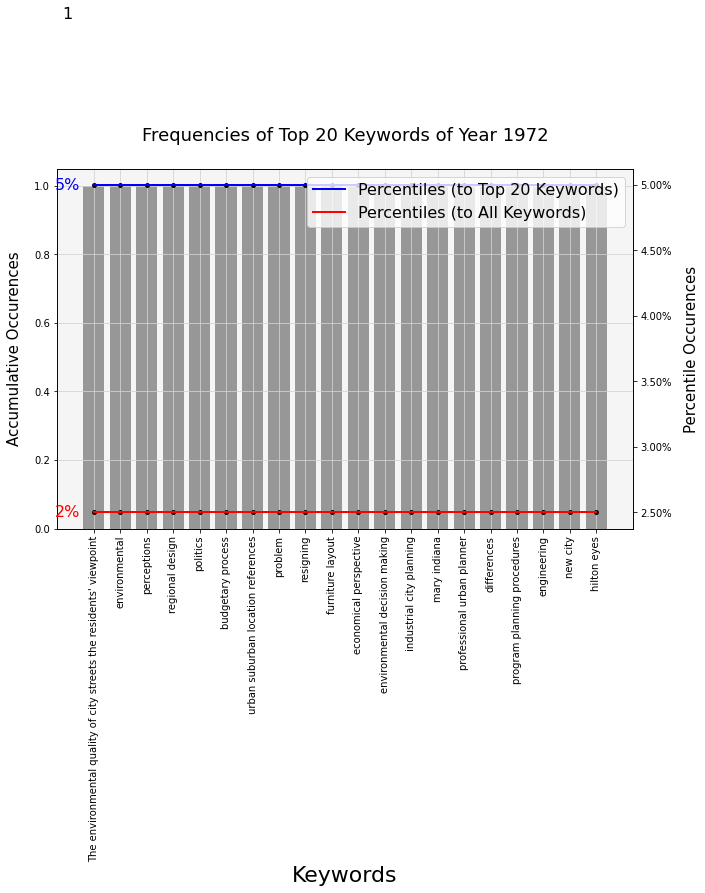

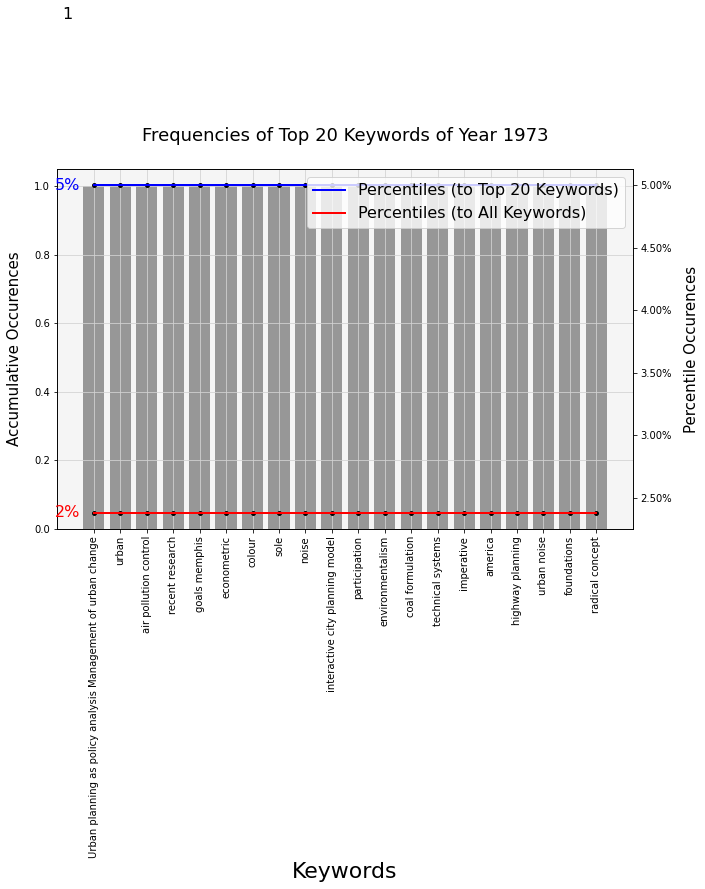

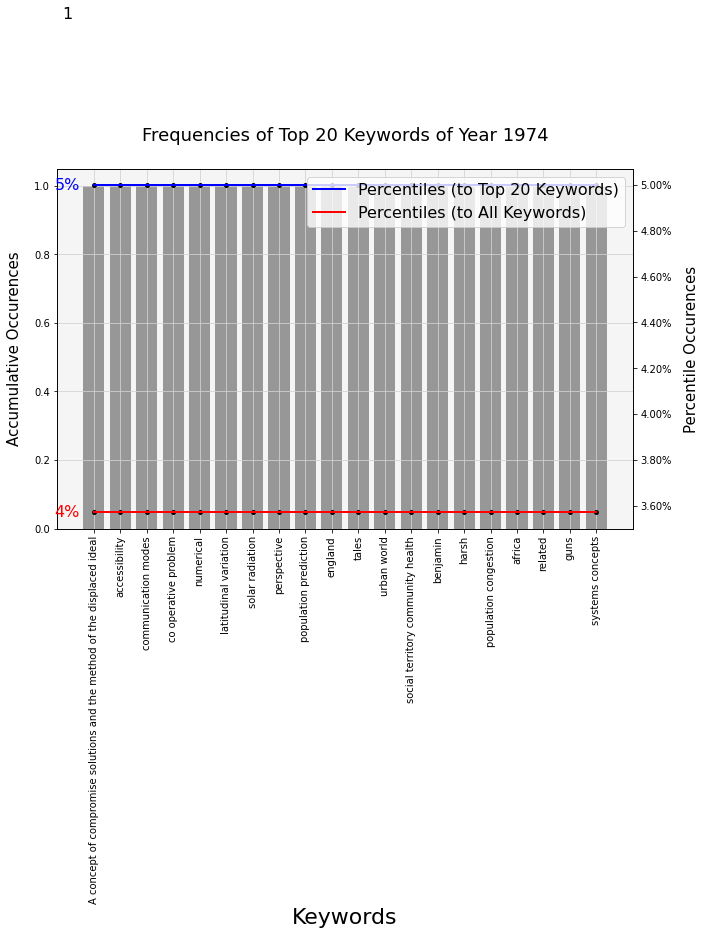

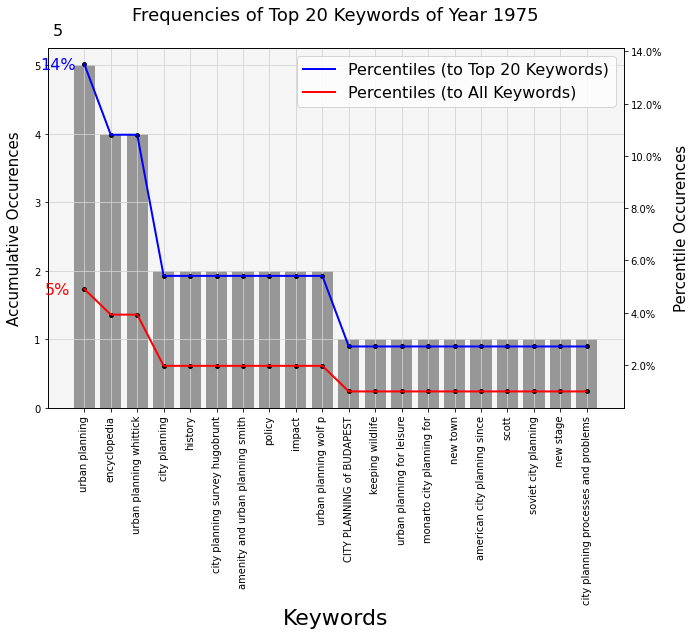

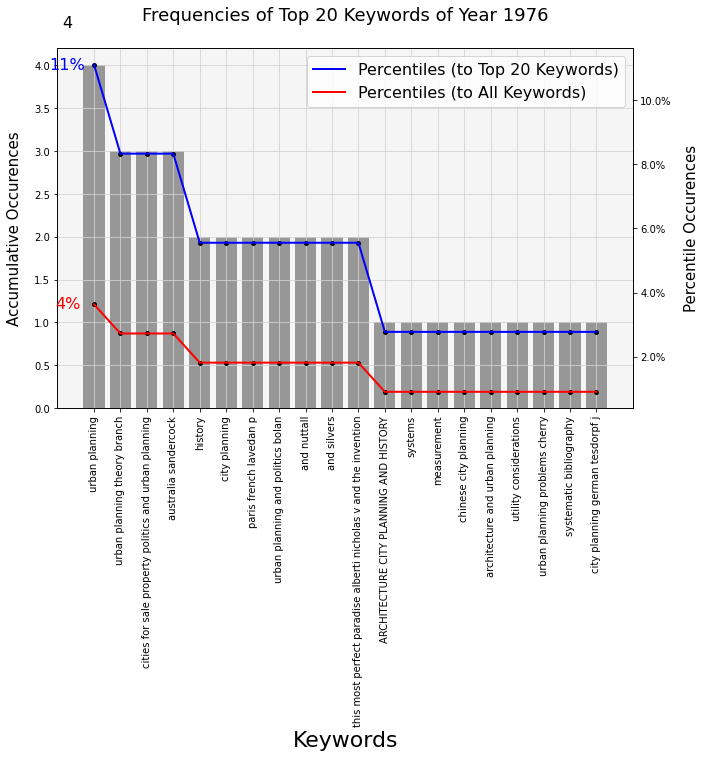

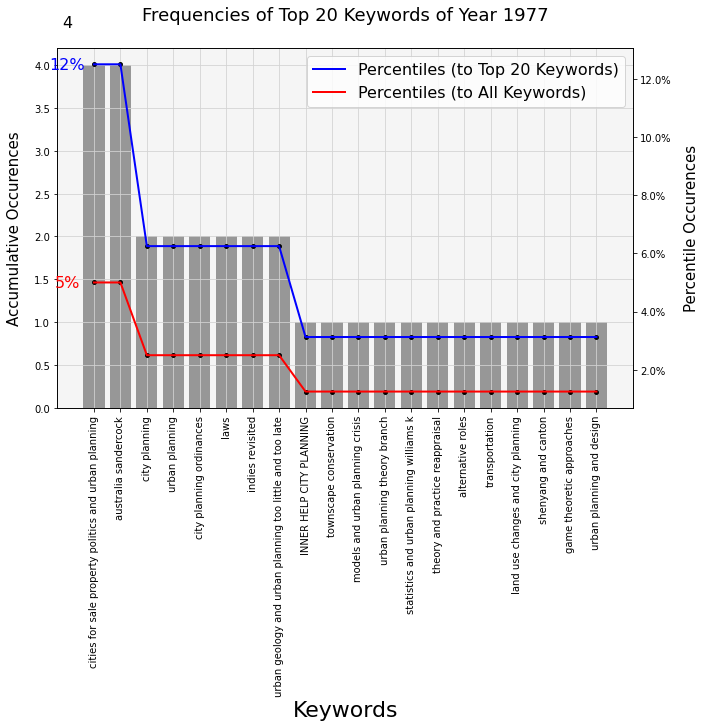

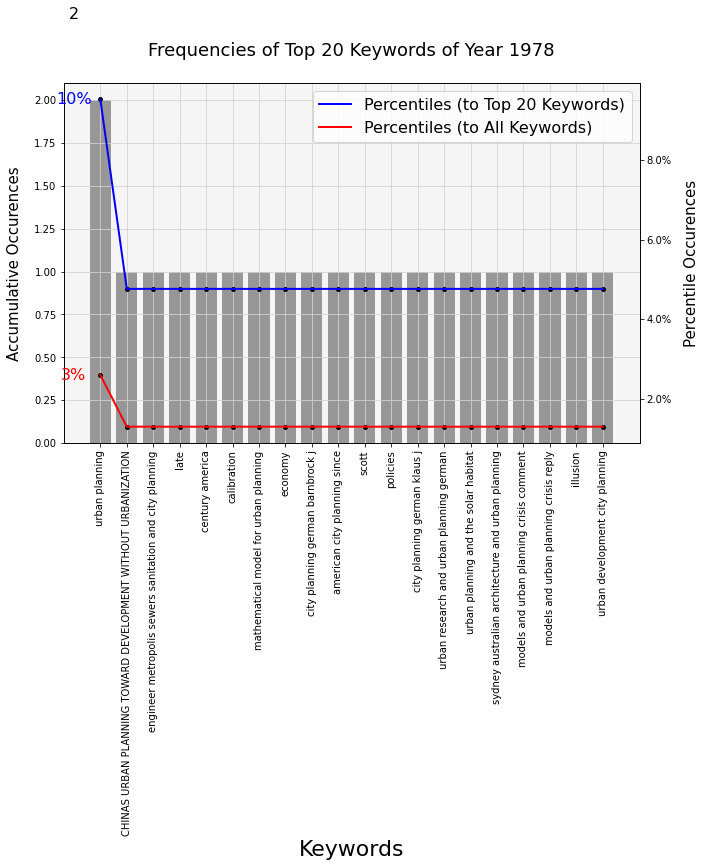

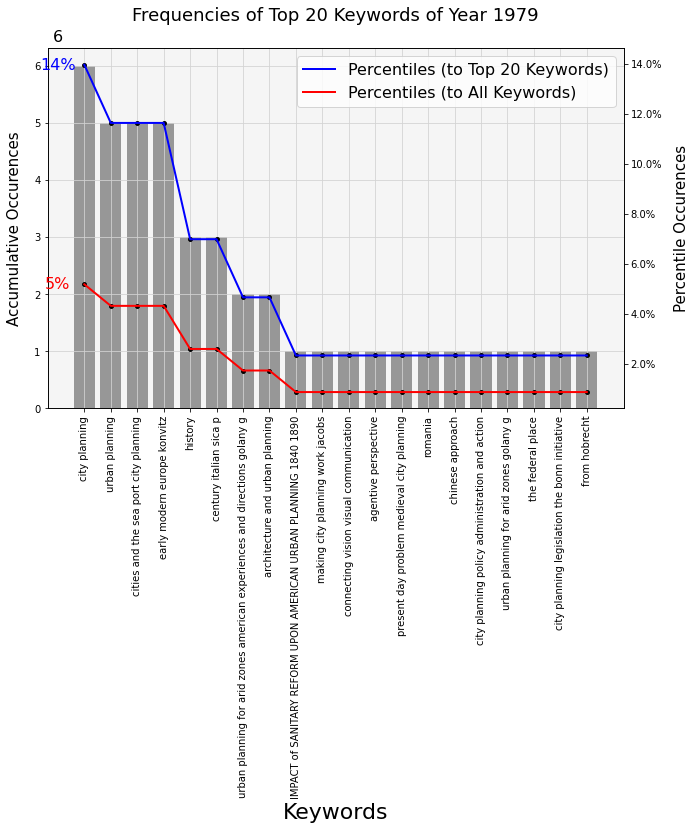

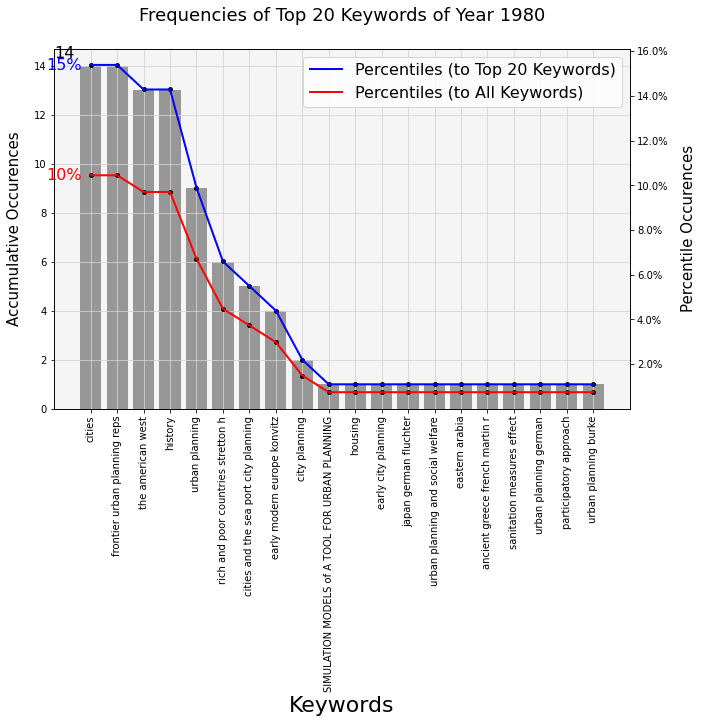

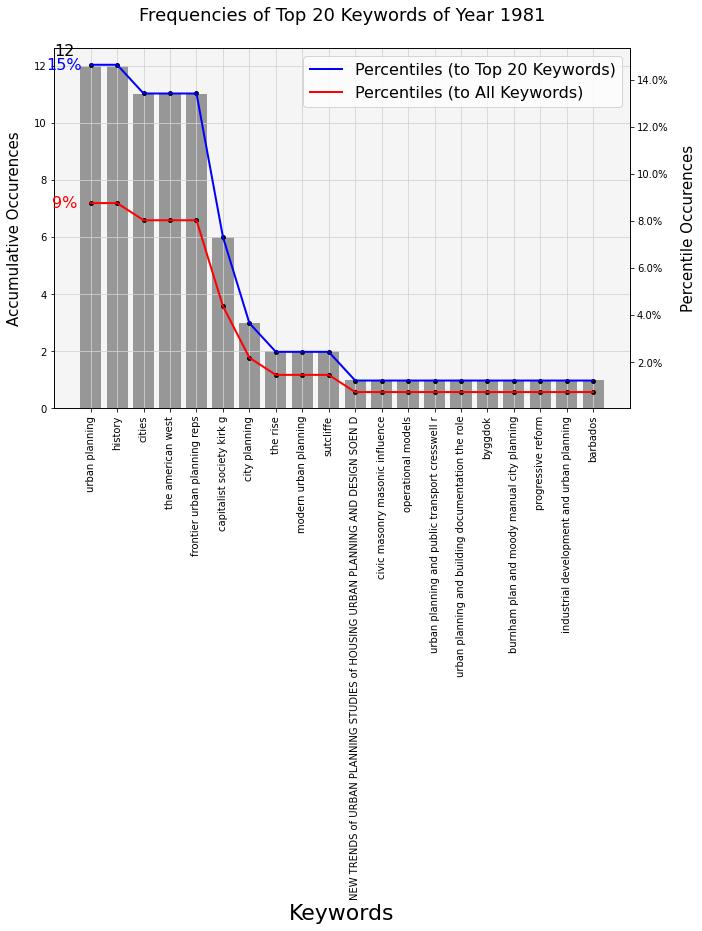

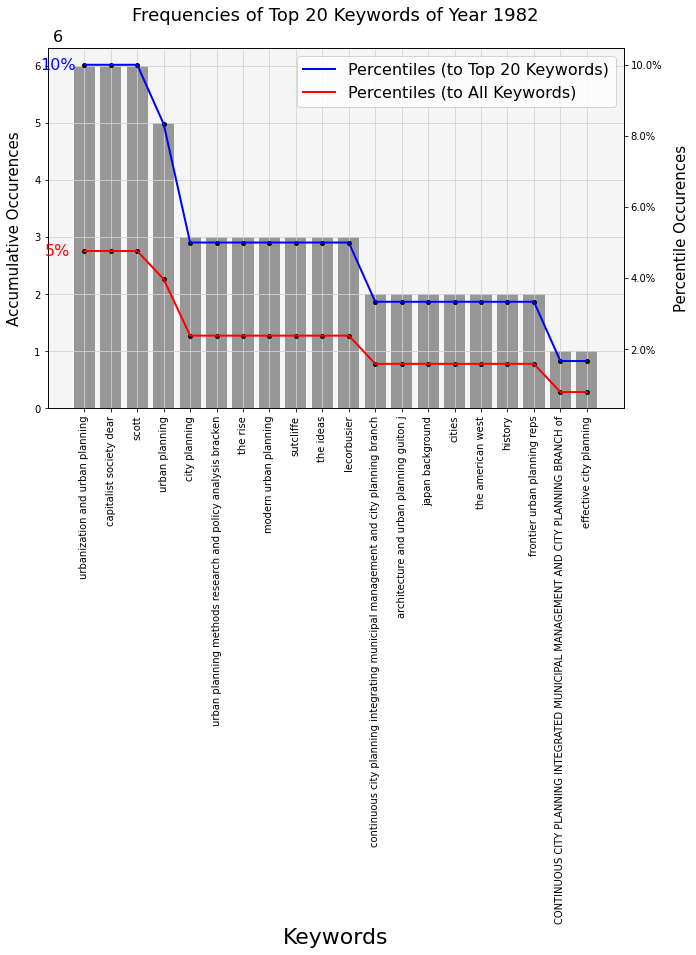

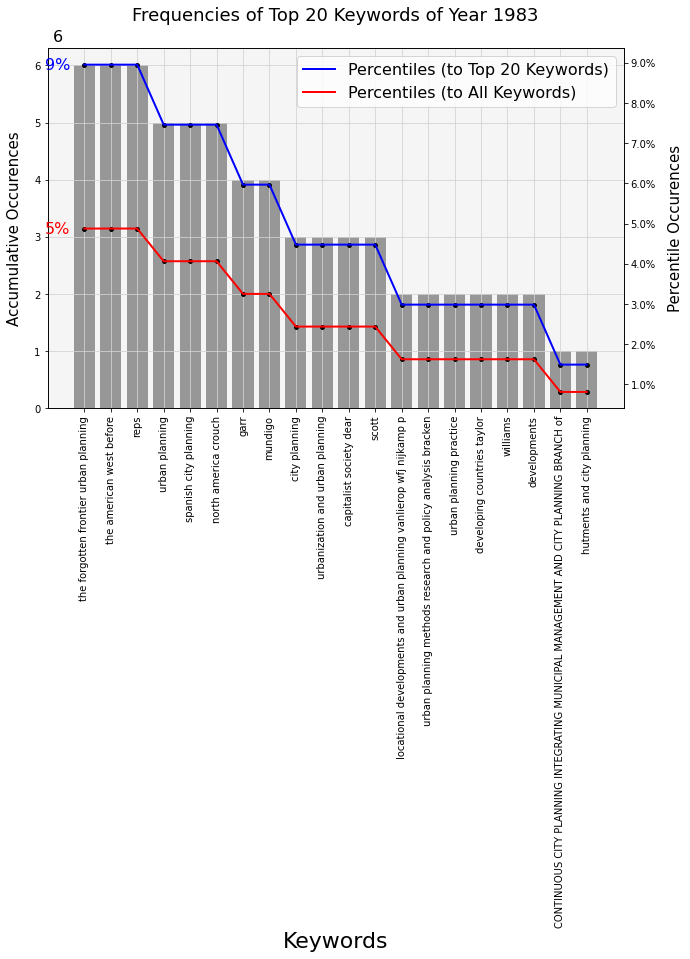

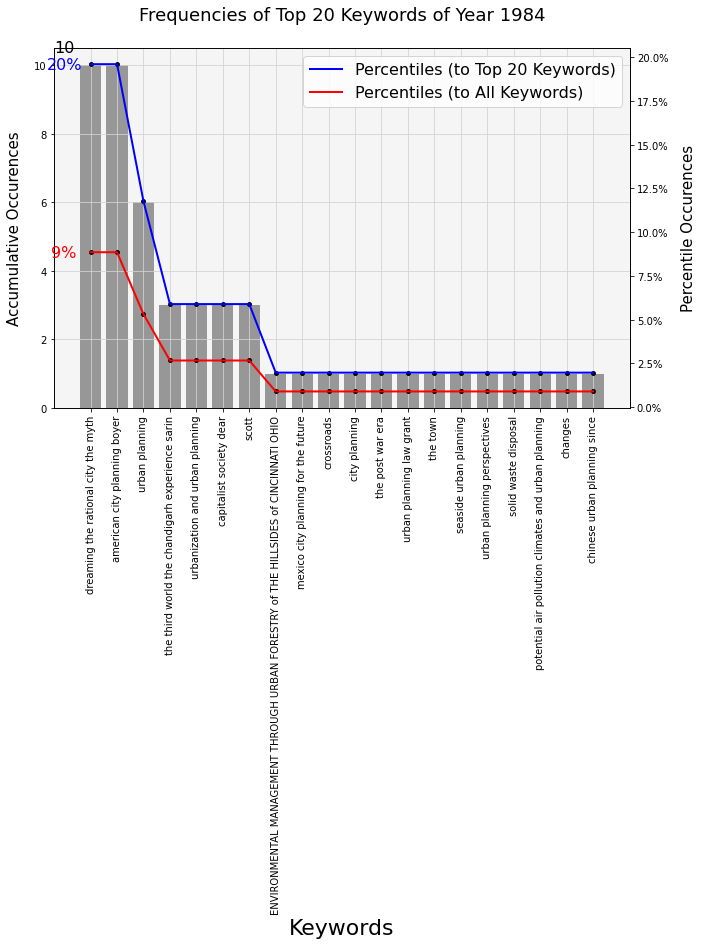

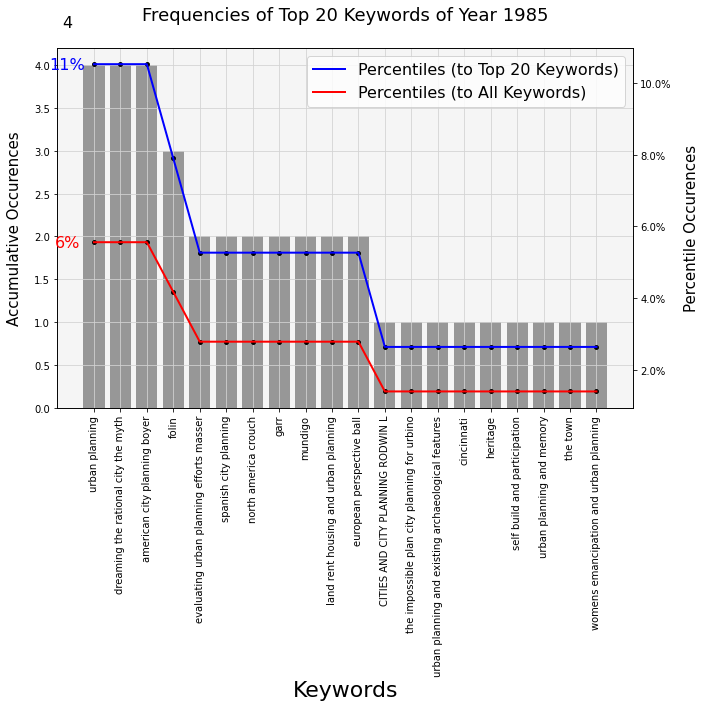

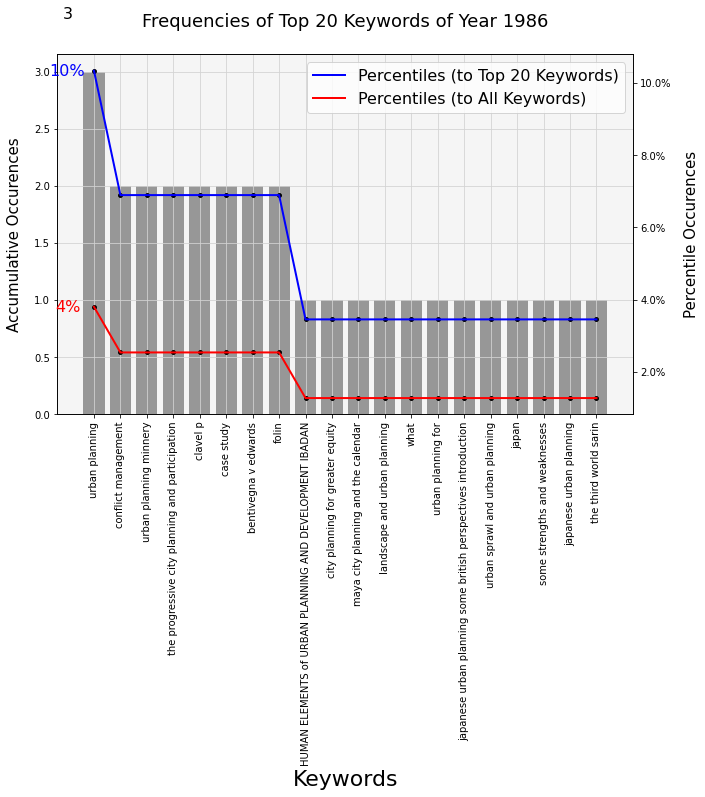

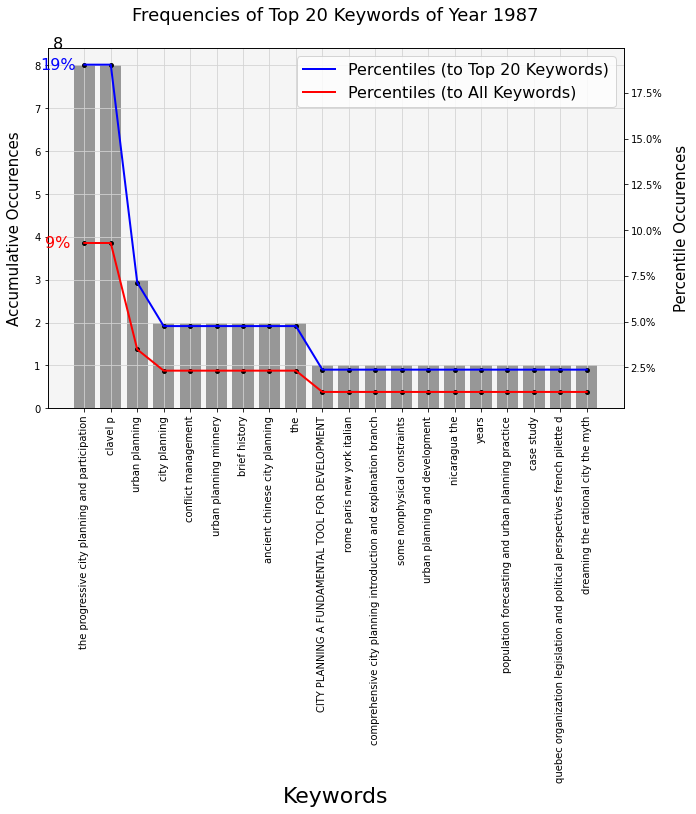

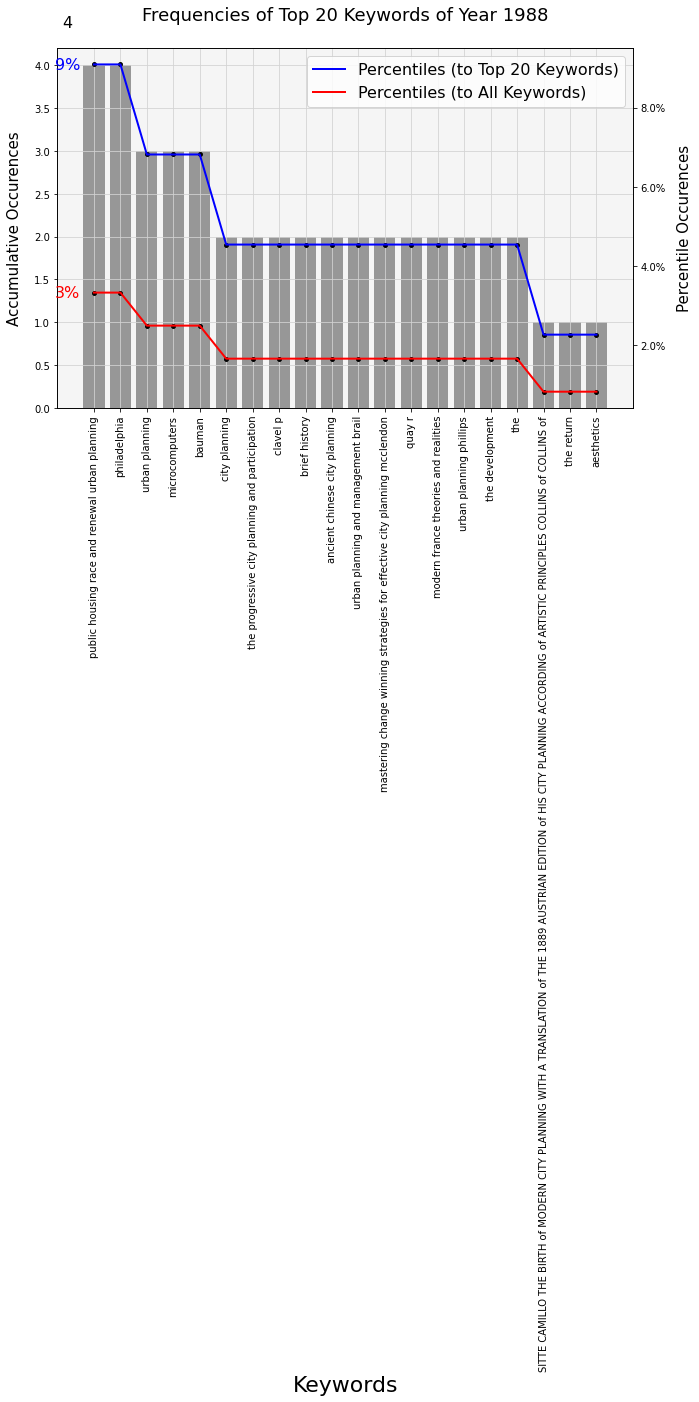

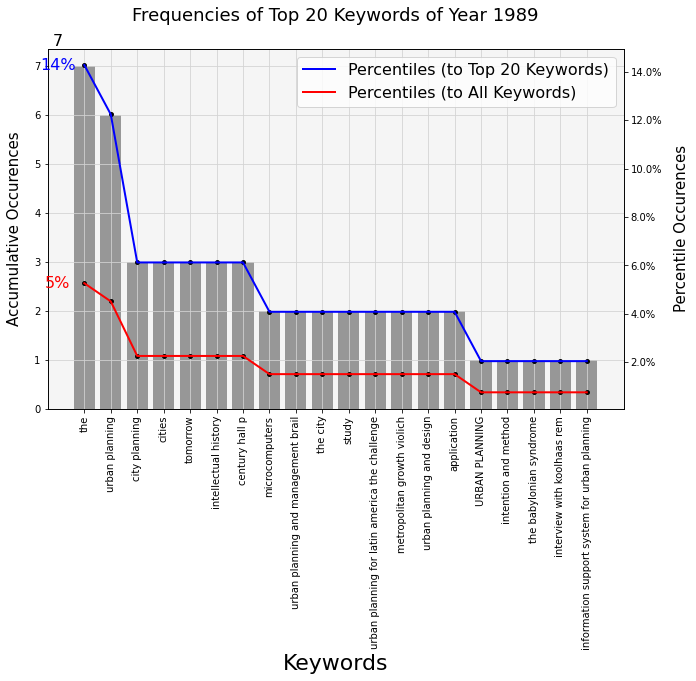

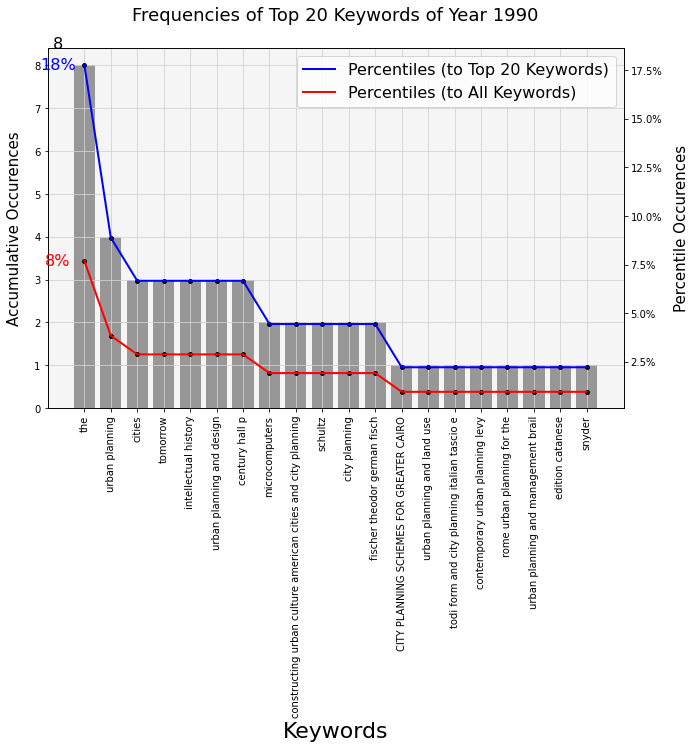

In [28]:
# Plot the frequencis of keywords of all years (using a single figure) 
Plot_Whole_Year_Barchart(file_dir, display_threshold_all_years)

# Separatly plot the frequencis of keywords of per years
Plot_Single_Year_Barchart(file_dir, display_threshold_per_year)

# 02 - Complex Network Analysis

[frozenset({'cities',
            'frontier urban planning reps',
            'history',
            'the american west'}),
 frozenset({'garr',
            'mundigo',
            'north america crouch',
            'spanish city planning'}),
 frozenset({'century hall p',
            'cities',
            'intellectual history',
            'the',
            'tomorrow',
            'urban planning',
            'urban planning and design'})]

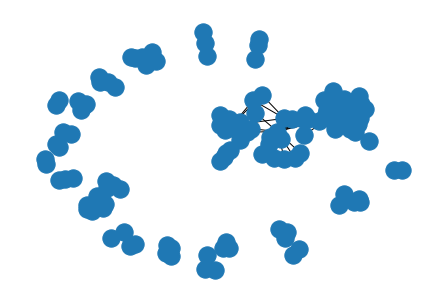

In [30]:
# Filter valid word-pair counts (co-words freq > 0)
perged_records = Purge_Co_Count(purged_file, co_word_freq_json)

# Establish the network
graph = Establish_All_Year_Network(purged_file, co_word_freq_json)
nx.draw(graph)

# Calculate K-clique community
from networkx.algorithms.community import k_clique_communities
c = list(k_clique_communities(graph, 4))
list(c)

In [31]:
# Plot all year graph
Plot_Network_via_graphistry(graph)
import graphistry
graphistry.register(api=3, username='qimingye', password='yqm323232') 
g = graphistry.bind(source='src', destination='dst', node='nodeid')
g.plot(graph)

# 03 - Add Tabu / Replacement Words

In [32]:
Add_to_tabu_json('the', ref_words)
Add_to_replace_json('town planning','urban planning',ref_words)

Succeed! The new word 'the' has been add to excluding list
Succefully added 'town planning' to existing mainword 'urban planning'
